In [1]:
#Importing libraries and setting the path

import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the packages needed to prepare data for modelling and to evaluate models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [4]:
#Importing the packages needed to handle datetime columns
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [5]:
#Importing the packages related to Logistic Regression
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [6]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [7]:
#Importing packages for the different algorithms that we'll be using
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import Lasso

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [8]:
#Importing packages required for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [9]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')
import gc

In [10]:
path = "F:\\UpGrad_ML\\Course 4 Machine Learning-2\\9 Telecom Churn Case Study\\"

In [11]:
#Please change the path to the location where the csv file is stored on your system

df = pd.read_csv(path + "telecom_churn_data.csv")

In [12]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [13]:
#This is to specify how many rows and columns are displayed:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [14]:
#Checking the data types and number of null values in all of them
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

# 1. Data Cleaning

In [15]:
#Creating a variable to store the percentage of missing values in each column

percent_missing = df.isnull().sum()*100/len(df)

In [16]:
#Checking the datatype and length of the percent_missing variable

print(type(percent_missing))
print(len(percent_missing))

<class 'pandas.core.series.Series'>
226


In [17]:
#Creating a dataframe that contains the percentage of missing values in each column

missing_values_df = pd.DataFrame({'Percent_values_missing':percent_missing})

#Going through the list of columns that contain more than 30% null values

missing_values_df[missing_values_df['Percent_values_missing'] >= 30]

,Percent_values_missing
date_of_last_rech_data_6,74.846748
date_of_last_rech_data_7,74.428744
date_of_last_rech_data_8,73.660737
date_of_last_rech_data_9,74.077741
total_rech_data_6,74.846748
total_rech_data_7,74.428744
total_rech_data_8,73.660737
total_rech_data_9,74.077741
max_rech_data_6,74.846748
max_rech_data_7,74.428744


#### Since the percentages are the same for each month, these null values could represent the people who do not use data on their phones.

In [18]:
#Creating a list of the columns associated with data in the month six

six_data_cols = ['total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6']

#### Let's check the number of rows that meet both of these two conditions:
     (1) the rows contain null values for all these columns (six_data_cols) 
     (2) the volume columns are zero

In [19]:
len(df[(df[six_data_cols].isnull().apply(lambda x: all(x), axis=1)) & (df.vol_2g_mb_6 == 0) & (df.vol_3g_mb_6 == 0)])

74846

#### Since this matches (74846*100/99999 = 74.846748), we can go ahead and impute zero in all these columns (in those particular rows)

In [20]:
#Generating the index values of the rows that satisfy the two conditions given above, and 
#converting them to a numpy array (to_numpy) and finally to a list

six_data_index = list(df[(df[six_data_cols].isnull().apply(lambda x: all(x), axis=1)) & (df.vol_2g_mb_6 == 0) & (df.vol_3g_mb_6 == 0)].index.to_numpy())

In [21]:
#Using loc to set these values to zero

df.loc[six_data_index, six_data_cols] = 0

#### Doing the same for the other months

In [22]:
#Creating a list of the columns associated with data in the months seven, eight, and nine

seven_data_cols = ['total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7']
eight_data_cols = ['total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_8']
nine_data_cols = ['total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'fb_user_9']

In [23]:
#Now creating a list of indices that satisfy the two conditions

seven_data_index = list(df[(df[seven_data_cols].isnull().apply(lambda x: all(x), axis=1)) & (df.vol_2g_mb_7 == 0) & (df.vol_3g_mb_7 == 0)].index.to_numpy())
eight_data_index = list(df[(df[eight_data_cols].isnull().apply(lambda x: all(x), axis=1)) & (df.vol_2g_mb_8 == 0) & (df.vol_3g_mb_8 == 0)].index.to_numpy())
nine_data_index = list(df[(df[nine_data_cols].isnull().apply(lambda x: all(x), axis=1)) & (df.vol_2g_mb_9 == 0) & (df.vol_3g_mb_9 == 0)].index.to_numpy())

In [24]:
#Using loc to set these values to zero

df.loc[seven_data_index, seven_data_cols] = 0
df.loc[eight_data_index, eight_data_cols] = 0
df.loc[nine_data_index, nine_data_cols] = 0

In [25]:
df.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [26]:
#Triggering garbage collection

gc.collect()

27

#### Checking the percentage of missing values in columns again

In [27]:
#Checking if there are any rows with all values missing

df.isnull().apply(lambda x: all(x), axis=1).sum()

0

In [28]:
#Checking if there are any rows with 70% missing values

df[(df.isnull().sum(axis=1)/len(df.columns)) >= 0.7]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


#### Recreating the dataframe that shows the percentage of missing values in each column

In [29]:
#Creating a variable to store the percentage of missing values in each column
percent_missing = df.isnull().sum()*100/len(df)

#Creating a dataframe that contains the percentage of missing values in each column
missing_values_df = pd.DataFrame({'Percent_values_missing':percent_missing})

#Going through the list of columns that contain more than 30% null values
missing_values_df.sort_values('Percent_values_missing', ascending=False)

,Percent_values_missing
date_of_last_rech_data_6,74.846748
date_of_last_rech_data_7,74.428744
date_of_last_rech_data_9,74.077741
date_of_last_rech_data_8,73.660737
loc_ic_t2t_mou_9,7.745077
loc_og_mou_9,7.745077
std_ic_t2f_mou_9,7.745077
loc_og_t2t_mou_9,7.745077
std_ic_t2m_mou_9,7.745077
loc_og_t2m_mou_9,7.745077


#### Since the percentages are same for each month, these null values probably represent the people who have not made (outgoing = 0) or received any calls (incoming = 0)

In [30]:
#Creating a list of columns related to incoming and outgoing calls in month 9

calls_9 = ['loc_ic_t2t_mou_9', 'loc_og_mou_9', 'std_ic_t2f_mou_9', 'loc_og_t2t_mou_9', 'std_ic_t2m_mou_9', 'loc_og_t2m_mou_9',
           'loc_og_t2f_mou_9', 'std_ic_t2t_mou_9', 'loc_og_t2c_mou_9', 'loc_ic_mou_9', 'std_og_t2m_mou_9', 'std_og_t2t_mou_9', 
           'loc_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'loc_ic_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 
           'std_og_mou_9', 'og_others_9', 'isd_og_mou_9', 'roam_og_mou_9', 'spl_og_mou_9', 'roam_ic_mou_9', 'onnet_mou_9', 
           'ic_others_9', 'spl_ic_mou_9', 'offnet_mou_9', 'std_ic_mou_9', 'isd_ic_mou_9']

#### Let's check the number of rows that meet both of these two conditions:
     (1) the rows contain null values for all these columns (calls_9) 
     (2) the total_ic_mou_9 and total_ic_mou_9 columns are zero

In [31]:
len(df[(df[calls_9].isnull().apply(lambda x: all(x), axis=1)) & (df.total_ic_mou_9 == 0) & (df.total_og_mou_9 == 0)])

7745

#### Since this matches (7745*100/99999 = 7.745077), we can go ahead and impute zero in all these columns (in those particular rows).

In [32]:
#Generating the index values of the rows that satisfy the two conditions given above, and 
#converting them to a numpy array (to_numpy) and finally to a list

nine_calls_index = list(df[(df[calls_9].isnull().apply(lambda x: all(x), axis=1)) & (df.total_ic_mou_9 == 0) & (df.total_og_mou_9 == 0)].index.to_numpy())

In [33]:
#Using loc to set these values to zero

df.loc[nine_calls_index, calls_9] = 0

#### Doing the same for the other months

In [34]:
#Creating a list of the columns associated with calls in the months six, seven, and eight

calls_6 = ['loc_ic_t2t_mou_6', 'loc_og_mou_6', 'std_ic_t2f_mou_6', 'loc_og_t2t_mou_6', 'std_ic_t2m_mou_6', 'loc_og_t2m_mou_6',
           'loc_og_t2f_mou_6', 'std_ic_t2t_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_mou_6', 'std_og_t2m_mou_6', 'std_og_t2t_mou_6', 
           'loc_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'loc_ic_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 
           'std_og_mou_6', 'og_others_6', 'isd_og_mou_6', 'roam_og_mou_6', 'spl_og_mou_6', 'roam_ic_mou_6', 'onnet_mou_6', 
           'ic_others_6', 'spl_ic_mou_6', 'offnet_mou_6', 'std_ic_mou_6', 'isd_ic_mou_6']


calls_7 = ['loc_ic_t2t_mou_7', 'loc_og_mou_7', 'std_ic_t2f_mou_7', 'loc_og_t2t_mou_7', 'std_ic_t2m_mou_7', 'loc_og_t2m_mou_7',
           'loc_og_t2f_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2c_mou_7', 'loc_ic_mou_7', 'std_og_t2m_mou_7', 'std_og_t2t_mou_7', 
           'loc_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'loc_ic_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 
           'std_og_mou_7', 'og_others_7', 'isd_og_mou_7', 'roam_og_mou_7', 'spl_og_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 
           'ic_others_7', 'spl_ic_mou_7', 'offnet_mou_7', 'std_ic_mou_7', 'isd_ic_mou_7']


calls_8 = ['loc_ic_t2t_mou_8', 'loc_og_mou_8', 'std_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2m_mou_8',
           'loc_og_t2f_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2c_mou_8', 'loc_ic_mou_8', 'std_og_t2m_mou_8', 'std_og_t2t_mou_8', 
           'loc_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 
           'std_og_mou_8', 'og_others_8', 'isd_og_mou_8', 'roam_og_mou_8', 'spl_og_mou_8', 'roam_ic_mou_8', 'onnet_mou_8', 
           'ic_others_8', 'spl_ic_mou_8', 'offnet_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8']

In [35]:
#Now creating a list of indices that satisfy the two conditions for calls

six_calls_index = list(df[(df[calls_6].isnull().apply(lambda x: all(x), axis=1)) & (df.total_ic_mou_6 == 0) & (df.total_og_mou_6 == 0)].index.to_numpy())
seven_calls_index = list(df[(df[calls_7].isnull().apply(lambda x: all(x), axis=1)) & (df.total_ic_mou_7 == 0) & (df.total_og_mou_7 == 0)].index.to_numpy())
eight_calls_index = list(df[(df[calls_8].isnull().apply(lambda x: all(x), axis=1)) & (df.total_ic_mou_8 == 0) & (df.total_og_mou_8 == 0)].index.to_numpy())

In [36]:
#Using loc to set these values to zero

df.loc[six_calls_index, calls_6] = 0
df.loc[seven_calls_index, calls_7] = 0
df.loc[eight_calls_index, calls_8] = 0

In [37]:
#Triggering garbage collection

gc.collect()

180

#### Recreating the dataframe that shows the percentage of missing values in each column

In [38]:
#Creating a variable to store the percentage of missing values in each column
percent_missing = df.isnull().sum()*100/len(df)

#Creating a dataframe that contains the percentage of missing values in each column
missing_values_df = pd.DataFrame({'Percent_values_missing':percent_missing})

#Going through the list of columns that contain more than 30% null values
missing_values_df.sort_values('Percent_values_missing', ascending=False)

,Percent_values_missing
date_of_last_rech_data_6,74.846748
date_of_last_rech_data_7,74.428744
date_of_last_rech_data_9,74.077741
date_of_last_rech_data_8,73.660737
date_of_last_rech_9,4.760048
date_of_last_rech_8,3.622036
date_of_last_rech_7,1.767018
last_date_of_month_9,1.659017
date_of_last_rech_6,1.607016
last_date_of_month_8,1.100011


In [39]:
#Checking the values in the t20 columns that have identical 1.018% missing values

print(df.loc_og_t2o_mou.value_counts())
print(df.std_og_t2o_mou.value_counts())
print(df.loc_ic_t2o_mou.value_counts())

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64


In [40]:
#As these columns only contain zeros, we can drop them

df= df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1)

In [41]:
#Triggering garbage collection

gc.collect()

80

##### Checking the last_date_of_month_* columns

In [42]:
print(df.last_date_of_month_9.value_counts())
print(df.last_date_of_month_8.value_counts())
print(df.last_date_of_month_7.value_counts())
print(df.last_date_of_month_6.value_counts())

9/30/2014    98340
Name: last_date_of_month_9, dtype: int64
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
6/30/2014    99999
Name: last_date_of_month_6, dtype: int64


##### Since these columns only indicate the last date of the month, we can impute the same value in the missing rows.

In [43]:
df.loc[list(df[(df['last_date_of_month_9'].isnull())].index.to_numpy()), 'last_date_of_month_9'] = "9/30/2014"
df.loc[list(df[(df['last_date_of_month_8'].isnull())].index.to_numpy()), 'last_date_of_month_8'] = "8/31/2014"
df.loc[list(df[(df['last_date_of_month_7'].isnull())].index.to_numpy()), 'last_date_of_month_7'] = "7/31/2014"
df.loc[list(df[(df['last_date_of_month_6'].isnull())].index.to_numpy()), 'last_date_of_month_6'] = "6/31/2014"

##### Checking the last_date_of_month_* columns

In [44]:
print(df.date_of_last_rech_9.mode())
print(df.date_of_last_rech_8.mode())
print(df.date_of_last_rech_7.mode())
print(df.date_of_last_rech_6.mode())

0    9/29/2014
dtype: object
0    8/31/2014
dtype: object
0    7/31/2014
dtype: object
0    6/30/2014
dtype: object


##### Imputing the mode value in the date_of_last_rech_* columns

In [45]:
df.loc[list(df[(df['date_of_last_rech_9'].isnull())].index.to_numpy()), 'date_of_last_rech_9'] = "9/29/2014"
df.loc[list(df[(df['date_of_last_rech_8'].isnull())].index.to_numpy()), 'date_of_last_rech_8'] = "8/31/2014"
df.loc[list(df[(df['date_of_last_rech_7'].isnull())].index.to_numpy()), 'date_of_last_rech_7'] = "7/31/2014"
df.loc[list(df[(df['date_of_last_rech_6'].isnull())].index.to_numpy()), 'date_of_last_rech_6'] = "6/30/2014"

#### Let's impute the last_date_of_month_* values into the null values in the date_of_last_rech_data_* columns.

This is so that these null values become zeros when we subtract date of recharge from the last day of the month.

In [46]:
#Storing the indices where the date_of_last_rech_data_* columns contain null values

date_6_index = list(df[df['date_of_last_rech_data_6'].isnull()].index.to_numpy())
date_7_index = list(df[df['date_of_last_rech_data_7'].isnull()].index.to_numpy())
date_8_index = list(df[df['date_of_last_rech_data_8'].isnull()].index.to_numpy())
date_9_index = list(df[df['date_of_last_rech_data_9'].isnull()].index.to_numpy())

In [47]:
#Imputing the last_date_of_month_* values into the date_of_last_rech_data_* columns

df.loc[date_6_index, 'date_of_last_rech_data_6'] = df.loc[date_6_index, 'last_date_of_month_6']
df.loc[date_7_index, 'date_of_last_rech_data_7'] = df.loc[date_7_index, 'last_date_of_month_7']
df.loc[date_8_index, 'date_of_last_rech_data_8'] = df.loc[date_8_index, 'last_date_of_month_8']
df.loc[date_9_index, 'date_of_last_rech_data_9'] = df.loc[date_9_index, 'last_date_of_month_9']

In [48]:
#Checking if this worked

df['date_of_last_rech_data_8'].isnull().sum()

0

#### Converting the columns with date information into datetime columns

In [49]:
#Checking the format of the string in these columns

print(df.last_date_of_month_6.value_counts())
print(df['date_of_last_rech_6'].value_counts()[0:5])
print(df['date_of_last_rech_data_6'].value_counts()[0:5])

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
6/30/2014    18567
6/29/2014    12918
6/27/2014    11169
6/28/2014     9491
6/26/2014     5530
Name: date_of_last_rech_6, dtype: int64
6/30/2014    76734
6/29/2014     1651
6/28/2014     1643
6/26/2014     1384
6/27/2014     1333
Name: date_of_last_rech_data_6, dtype: int64


In [50]:
#Converting these string columns into datetime objects by reading the month, day, and year from the string

#Converting columns last_date_of_month_* 
df['last_date_of_month_6'] = df['last_date_of_month_6'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
df['last_date_of_month_7'] = df['last_date_of_month_7'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
df['last_date_of_month_8'] = df['last_date_of_month_8'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
df['last_date_of_month_9'] = df['last_date_of_month_9'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))

#Converting columns date_of_last_rech_*
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
df['date_of_last_rech_8'] = df['date_of_last_rech_8'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))
df['date_of_last_rech_9'] = df['date_of_last_rech_9'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))

#Converting columns date_of_last_rech_data_*
df['date_of_last_rech_data_6'] = df['date_of_last_rech_data_6'].apply(lambda x: datetime.strptime(str(x), "%m/%d/%Y"))
df['date_of_last_rech_data_7'] = df['date_of_last_rech_data_7'].apply(lambda x: datetime.strptime(str(x), "%m/%d/%Y"))
df['date_of_last_rech_data_8'] = df['date_of_last_rech_data_8'].apply(lambda x: datetime.strptime(str(x), "%m/%d/%Y"))
df['date_of_last_rech_data_9'] = df['date_of_last_rech_data_9'].apply(lambda x: datetime.strptime(str(x), "%m/%d/%Y"))

In [51]:
#Checking if the conversion has worked

print(df['last_date_of_month_8'].dtypes)
print(df['date_of_last_rech_9'].dtypes)
print(df['date_of_last_rech_data_7'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


#### Checking if there are any columns with missing values

In [52]:
#Creating a variable to store the percentage of missing values in each column
percent_missing = df.isnull().sum()*100/len(df)

#Creating a dataframe that contains the percentage of missing values in each column
missing_values_df = pd.DataFrame({'Percent_values_missing':percent_missing})

#Going through the list of columns that contain more than 30% null values
missing_values_df.sort_values('Percent_values_missing', ascending=False)

,Percent_values_missing
mobile_number,0.0
last_day_rch_amt_9,0.0
max_rech_amt_6,0.0
max_rech_amt_7,0.0
max_rech_amt_8,0.0
max_rech_amt_9,0.0
date_of_last_rech_6,0.0
date_of_last_rech_7,0.0
date_of_last_rech_8,0.0
date_of_last_rech_9,0.0


In [53]:
#Deleting the dataframe and variables that we won't use in future

del missing_values_df, percent_missing

In [54]:
#Triggering garbage collection

gc.collect()

80

In [55]:
df.describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0000

#### Checking for columns that contain only zeros

In [56]:
#Checking if some columns have only zeros

print(df.std_og_t2c_mou_6.value_counts())
print(df.std_og_t2c_mou_7.value_counts())
print(df.std_og_t2c_mou_8.value_counts())
print(df.std_og_t2c_mou_9.value_counts())
print(df.std_ic_t2o_mou_6.value_counts())
print(df.std_ic_t2o_mou_7.value_counts())
print(df.std_ic_t2o_mou_8.value_counts())
print(df.std_ic_t2o_mou_9.value_counts())

0.0    99999
Name: std_og_t2c_mou_6, dtype: int64
0.0    99999
Name: std_og_t2c_mou_7, dtype: int64
0.0    99999
Name: std_og_t2c_mou_8, dtype: int64
0.0    99999
Name: std_og_t2c_mou_9, dtype: int64
0.0    99999
Name: std_ic_t2o_mou_6, dtype: int64
0.0    99999
Name: std_ic_t2o_mou_7, dtype: int64
0.0    99999
Name: std_ic_t2o_mou_8, dtype: int64
0.0    99999
Name: std_ic_t2o_mou_9, dtype: int64


In [57]:
#Dropping these columns

df = df.drop(['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 
             'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], axis=1)

In [58]:
#Triggering garbage collection

gc.collect()

54

# 2. Filtering High-Value Customers

#### Let's calculate the total recharge amounts for all customers in the months 6 and 7 (which represent the good phase).

In [59]:
#Adding the recharge amounts to the data recharge amounts in each month

df['total_recharge_amt_6'] = df['total_rech_amt_6'] + df['total_rech_data_6']
df['total_recharge_amt_7'] = df['total_rech_amt_7'] + df['total_rech_data_7']

In [60]:
#Calculating the average recharge amount in the two months

df['avg_recharge_amt_good_phase'] = (df['total_recharge_amt_6'] + df['total_recharge_amt_7'])/2

In [61]:
#Calculating the 70 percentile cutoff value for the avg_recharge_amt_good_phase

high_value_cutoff= df['avg_recharge_amt_good_phase'].quantile(q = 0.7)

In [62]:
#Storing the data on the high value customers in a separate dataframe

df_hvc = df[df['avg_recharge_amt_good_phase'] >= high_value_cutoff]

In [63]:
#Checking the number of rows in the new dataframe

df_hvc.shape

(30019, 218)

##### The number of high value customers is equal to 30,019.

# 3. Deriving Churn

In [64]:
df_hvc.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 99997
Data columns (total 218 columns):
mobile_number                  30019 non-null int64
circle_id                      30019 non-null int64
last_date_of_month_6           30019 non-null datetime64[ns]
last_date_of_month_7           30019 non-null datetime64[ns]
last_date_of_month_8           30019 non-null datetime64[ns]
last_date_of_month_9           30019 non-null datetime64[ns]
arpu_6                         30019 non-null float64
arpu_7                         30019 non-null float64
arpu_8                         30019 non-null float64
arpu_9                         30019 non-null float64
onnet_mou_6                    30019 non-null float64
onnet_mou_7                    30019 non-null float64
onnet_mou_8                    30019 non-null float64
onnet_mou_9                    30019 non-null float64
offnet_mou_6                   30019 non-null float64
offnet_mou_7                   30019 non-null float64
of

In [65]:
#Creating an index of rows that represent customers who have churned

churn_tag = list(df_hvc[(df_hvc.total_og_mou_9 == 0) & (df_hvc.total_ic_mou_9 == 0) & (df_hvc.vol_2g_mb_9 == 0) & (df_hvc.vol_3g_mb_9 == 0)].index.to_numpy())

In [66]:
#Creating a new column to indicate customer churn

df_hvc['churn'] = 0

In [67]:
#Inserting '1' for customers who have been tagged as churned

df_hvc.loc[churn_tag, 'churn'] = 1

In [68]:
#Checking churn percentage

df_hvc['churn'].sum()*100/len(df_hvc['churn'])

8.627869016289683

In [69]:
#Creating a list of the columns that relate to month 9

churn_month_cols =  [x for x in df_hvc.columns if("_9" in x)]
len(churn_month_cols)

52

In [70]:
#Dropping the columns that relate to month 9, as our model will overfit to this data if it's included (since these columns
#indicate if a customer has churned)

df_hvc = df_hvc.drop(churn_month_cols + ['sep_vbc_3g'], axis=1)

In [71]:
df_hvc.shape

(30019, 166)

In [72]:
#Deleting the old dataframe to save memory space

del df

In [73]:
#Triggering garbage collection

gc.collect()

83

# 4. EDA, Outlier Treatment, and Derived Variables

#### Lets review recharge details of the months 6, 7, & 8
    1. Number of recharges done in months 6, 7, & 8
    2. Total recharge amount in months 6, 7, & 8
    3. Max recharge amounts in the months 6, 7, & 8
    4. Visualizing the average revenue against the total recharge amount

### 4a. Visualization

### 1. Number of times a customer recharged—trend

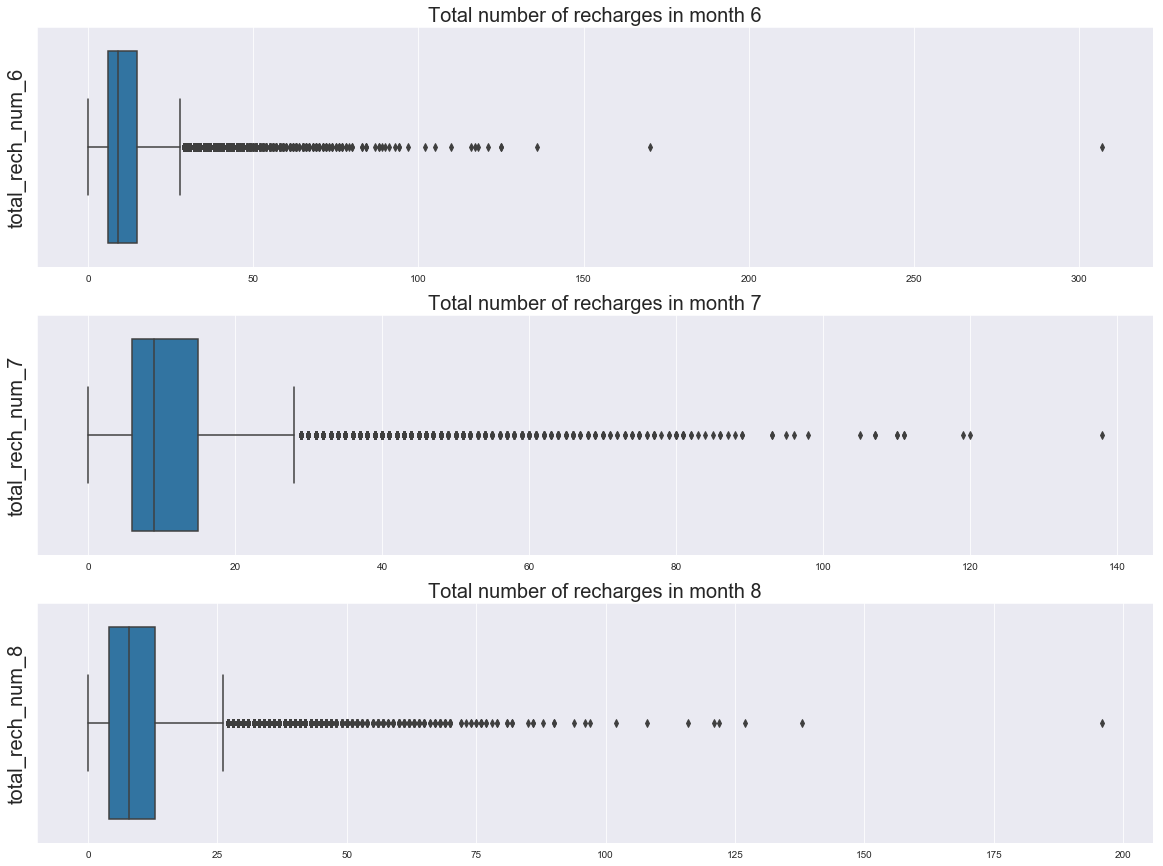

In [74]:
sns.set_style("darkgrid")
fig, axis = plt.subplots(figsize = (20, 15), nrows = 3, ncols = 1)

sns.boxplot(x = df_hvc["total_rech_num_6"], ax = axis[0])

sns.boxplot(x = df_hvc["total_rech_num_7"], ax = axis[1])

sns.boxplot(x = df_hvc["total_rech_num_8"], ax = axis[2])

axis[0].set_title ("Total number of recharges in month 6",fontsize = 20)
axis[1].set_title ("Total number of recharges in month 7",fontsize = 20)
axis[2].set_title ("Total number of recharges in month 8",fontsize = 20)

axis[0].set_ylabel("total_rech_num_6",fontsize = 20)
axis[1].set_ylabel("total_rech_num_7",fontsize = 20)
axis[2].set_ylabel("total_rech_num_8",fontsize = 20)

axis[0].set_xlabel("")
axis[1].set_xlabel("")
axis[2].set_xlabel("")

plt.show()

### 2. Total recharge amount in months 6, 7, & 8—trend

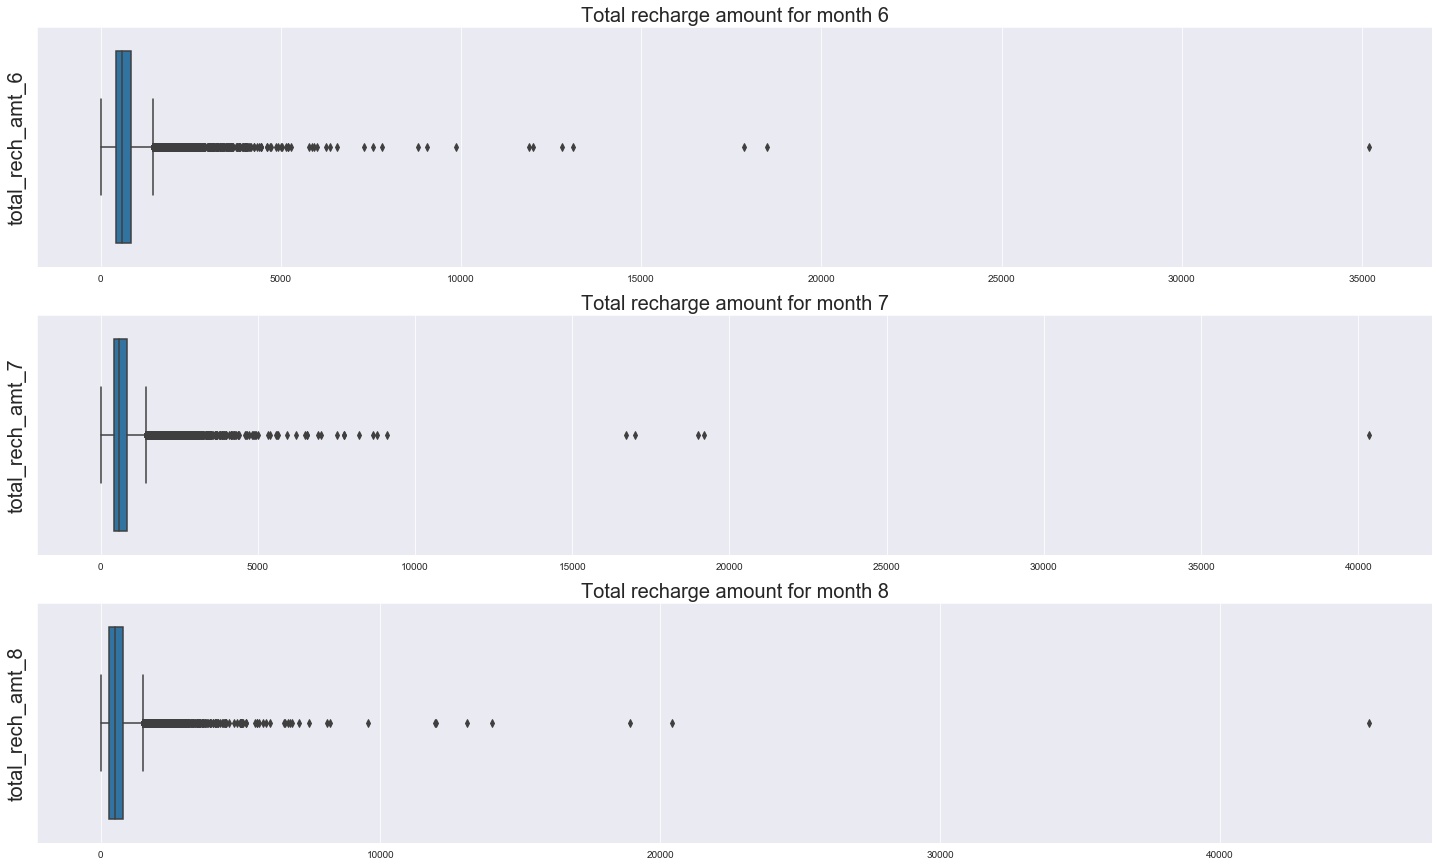

In [75]:
sns.set_style("darkgrid")

fig, axis = plt.subplots(figsize = (25,15), nrows = 3, ncols = 1)

sns.boxplot(x = df_hvc["total_rech_amt_6"], ax = axis[0])

sns.boxplot(x = df_hvc["total_rech_amt_7"], ax = axis[1])

sns.boxplot(x = df_hvc["total_rech_amt_8"], ax = axis[2])

axis[0].set_title ("Total recharge amount for month 6",fontsize = 20)
axis[1].set_title ("Total recharge amount for month 7",fontsize = 20)
axis[2].set_title ("Total recharge amount for month 8",fontsize = 20)

axis[0].set_ylabel("total_rech_amt_6",fontsize = 20)
axis[1].set_ylabel("total_rech_amt_7",fontsize = 20)
axis[2].set_ylabel("total_rech_amt_8",fontsize = 20)

axis[0].set_xlabel("")
axis[1].set_xlabel("")
axis[2].set_xlabel("")

plt.show()

### 3. Max recharge amount for months 6, 7, & 8

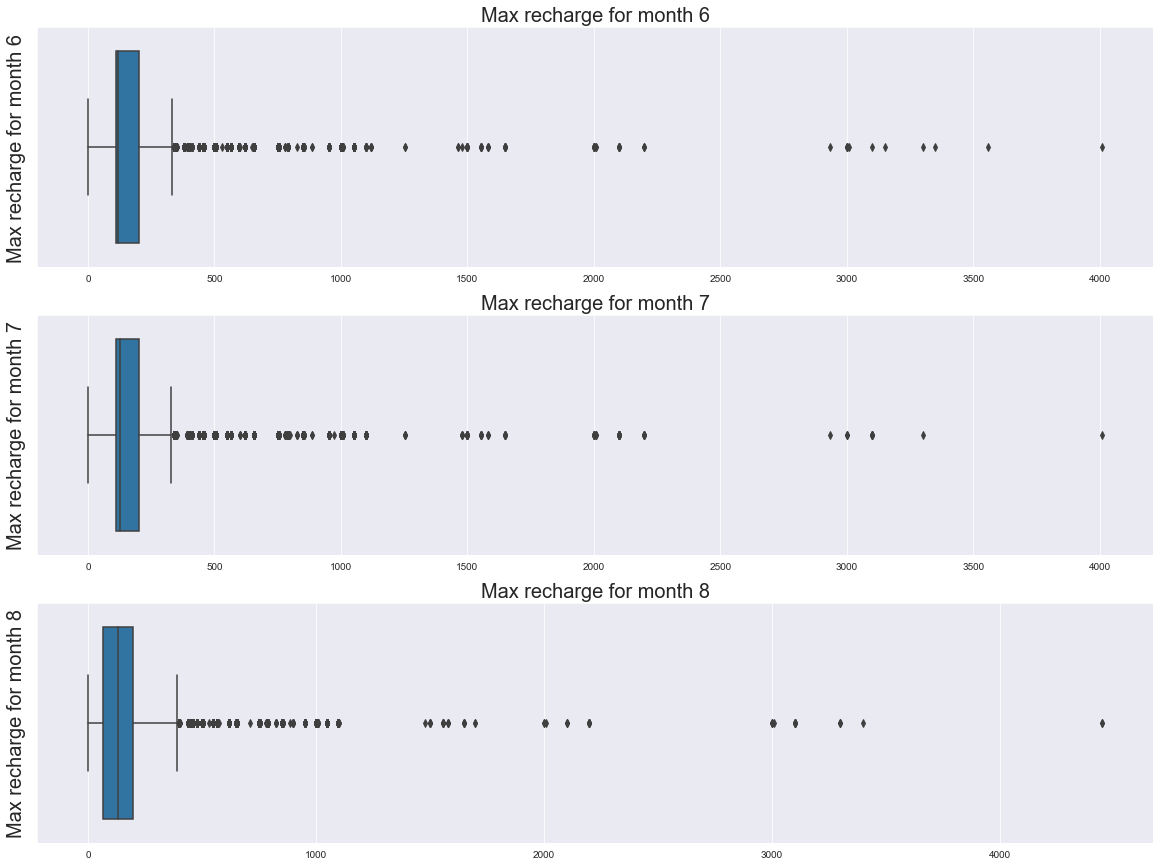

In [76]:
sns.set_style("darkgrid")

fig, axis = plt.subplots(figsize = (20,15), nrows = 3, ncols = 1)

sns.boxplot(x = df_hvc["max_rech_amt_6"], ax = axis[0])
sns.boxplot(x = df_hvc["max_rech_amt_7"], ax = axis[1])
sns.boxplot(x = df_hvc["max_rech_amt_8"], ax = axis[2])

axis[0].set_title ("Max recharge for month 6",fontsize = 20)
axis[1].set_title ("Max recharge for month 7",fontsize = 20)
axis[2].set_title ("Max recharge for month 8",fontsize = 20)


axis[0].set_ylabel("Max recharge for month 6",fontsize = 20)
axis[1].set_ylabel("Max recharge for month 7",fontsize = 20)
axis[2].set_ylabel("Max recharge for month 8",fontsize = 20)

axis[0].set_xlabel("")
axis[1].set_xlabel("")
axis[2].set_xlabel("")

plt.show()

### 4. Visualizing the average revenue against the total recharge amount

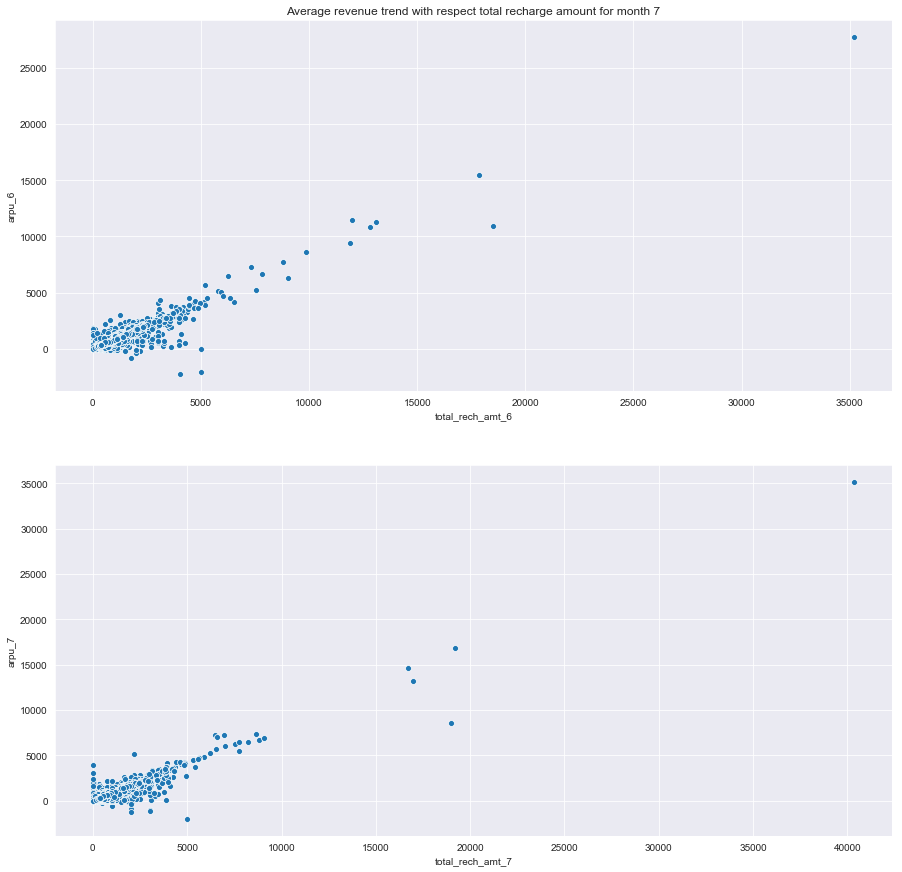

In [77]:
fig,axis = plt.subplots(nrows= 2, ncols = 1, figsize = (15,15))

sns.scatterplot(y = df_hvc["arpu_6"], x =df_hvc["total_rech_amt_6"],ax = axis[0])
sns.scatterplot(y = df_hvc["arpu_7"], x =df_hvc["total_rech_amt_7"],ax = axis[1])

axis[0].set_title("Average revenue trend with respect total recharge amount for month 6")
axis[0].set_title("Average revenue trend with respect total recharge amount for month 7")

axis[0].tick_params(axis='both', which='major', labelsize=10)
axis[1].tick_params(axis='both', which='major', labelsize=10)

fig.show()

### 4b. Outlier Treatment

#### As we can see from these graphs, there are outliers in a lot of columns

In [78]:
#Viewing the quantile values to see how far off the highest outliers are

df_hvc.quantile([0, .25, .5, .75, .9, .95, 1], axis=0)

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_recharge_amt_6,total_recharge_amt_7,avg_recharge_amt_good_phase,churn
0.00,7.000000e+09,109.0,-2258.7090,-2014.0450,-945.8080,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,-30.280,-26.040,-20.040,-15.320,-15.480,-24.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.000,0.000,0.000,0.0,0.0,369.5,0.0
0.25,7.000641e+09,109.0,364.0825,364.9760,289.6860,40.920,40.785,26.890,137.090,135.375,95.270,0.000,0.000,0.00,0.000,0.000,0.000,8.310,9.090,5.755,30.200,33.520,22.380,0.000,0.000,0.000,0.00,0.00,0.000,50.850,56.635,38.140,0.000,0.000,0.000,1.580,1.330,0.000,0.000,0.000,0.000,5.905,5.530,1.760,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.00,265.485,274.290,187.910,8.285,9.460,6.780,33.440,38.100,29.630,0.00,0.000,0.000,56.62,63.490,49.950,0.000,0.000,0.000,0.450,0.480,0.000,0.000,0.000,0.00,2.630,2.780,1.430,89.765,98.750,78.840,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.00,6.0,6.0,4.0,432.0,426.0,309.0,110.0,110.0,67.0,30.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,479.0,0.00

#### Let's drop the rows that contain a value that is above the 99.95 percentile value in each column

In [79]:
#Storing the 99.95 percentile value in the outliers_9995 variable

outliers_9995 = df_hvc.quantile(.9995, axis=0)
print(len(outliers_9995))
print(type(outliers_9995))

157
<class 'pandas.core.series.Series'>


Since this is a series variable, we can use it's index.

In [80]:
#Creating a list of all columns in the dataframe

check_cols = list(df_hvc.columns)
len(check_cols)

166

In [81]:
#Noting the columns that are not suitable for outlier treatment: columns with categorical or datetime variables

ignore_cols = ['mobile_number', 'circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 
                    'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'night_pck_user_6', 'night_pck_user_8', 
                    'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'night_pck_user_7']
len(ignore_cols)

18

In [82]:
#Trimming the list of columns to retain only those columns whose outliers need to be treated

for col in ignore_cols:
    check_cols.remove(col)

len(check_cols)

148

In [83]:
#Creating a copy of the dataframe

df_2 = df_hvc.copy()

In [84]:
#Discarding the values that are above 99.95 percentile in each column

for col in df_2.columns:
    if col in check_cols:
        df_2 = df_2[df_2[col] <= outliers_9995[col]]
        
df_2.shape

(29082, 166)

#### We have deleted approximately 3% of the data for outlier treatment.

In [85]:
#Viewing the quantile values in the new dataframe

df_2.quantile([0, .25, .5, .75, .9, .95, .99, 1], axis=0)

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_recharge_amt_6,total_recharge_amt_7,avg_recharge_amt_good_phase,churn
0.00,7.000000e+09,109.0,-810.66100,-897.03500,-345.12900,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.00,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-30.2800,-26.0400,-20.0400,-15.3200,-15.48,-24.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0000,0.0000,0.0000,0.00,0.00,369.50,0.0
0.25,7.000643e+09,109.0,362.59625,363.03650,287.73100,41.4300,41.3100,27.1825,137.2300,135.490,95.6600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.4400,9.2825,5.8525,30.4800,33.8450,22.6650,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,51.2100,57.1900,38.6375,0.0000,0.0000,0.0000,1.6800,1.4000,0.0000,0.0000,0.0000,0.0000,6.0600,5.7425,1.8500,0.000,0.00,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.00,267.2500,275.6500,189.1400,8.4100,9.5600,6.8900,33.5825,38.4300,29.9450,0.0000,0.0000,0.0000,56.8900,63.6950,50.2950,0.0000,0.0000,0.0000,0.4600,0.480,0.0000,0.0000,0.0000,0.0000,2.6300,2.7900,1.4500,89.6150,98.5800,78.8175,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0,6.0,4.0,430.0,425.00,307.00,110.0,110.0,67.0,30.0,27.0,0.0,0.0,0.0,0.0,0

#### Most columns still contain outliers. If we delete another 0.05% of data from all columns, the number of rows will drop down to ~23,000. Let's cap the columns to their 99th percentile values instead.

In [86]:
#Storing the 99th percentile values of each column

outliers_99 = df_2.quantile(.99, axis=0)

In [87]:
#Capping all columns to their 99th percentile values

for col in df_2.columns:
    if col in check_cols:
        df_2[col][df_2[col] > outliers_99[col]] = outliers_99[col]

In [ ]:
'''
#Here's a better way to cap outlier values:

def outlier_capper(df, cols_to_cap, cap_limit=0.9995):
    for col in df.columns:
        if col in cols_to_cap:
            col_limit = df[col].quantile(cap_limit)
            df[col] = np.clip(a = df[col], a_min = None, a_max = col_limit)
    return df



train_df = outlier_capper(train_df, cols_outliers_9995, 0.995)

'''

In [88]:
#Viewing the quantile values again

df_2.quantile([0, .25, .5, .75, .9, .95, .99, 1], axis=0)

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_recharge_amt_6,total_recharge_amt_7,avg_recharge_amt_good_phase,churn
0.00,7.000000e+09,109.0,-810.661000,-897.03500,-345.129000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,-30.280000,-26.040000,-20.040000,-15.3200,-15.48,-24.430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.000000,0.00000,0.000000,0.0000,0.0000,369.5000,0.0
0.25,7.000643e+09,109.0,362.596250,363.03650,287.731000,41.430000,41.310000,27.182500,137.230000,135.49000,95.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.440000,9.282500,5.85250,30.480000,33.84500,22.665000,0.00000,0.000000,0.000000,0.0000,0.00,0.000000,51.210000,57.190000,38.63750,0.000000,0.000000,0.000000,1.680000,1.400000,0.00000,0.000000,0.000000,0.000000,6.060000,5.742500,1.850000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,267.250000,275.650000,189.140000,8.410000,9.560000,6.89000,33.582500,38.430000,29.945000,0.000000,0.0

##### Let's check how this has affected some of the variables that we visualized earlier.

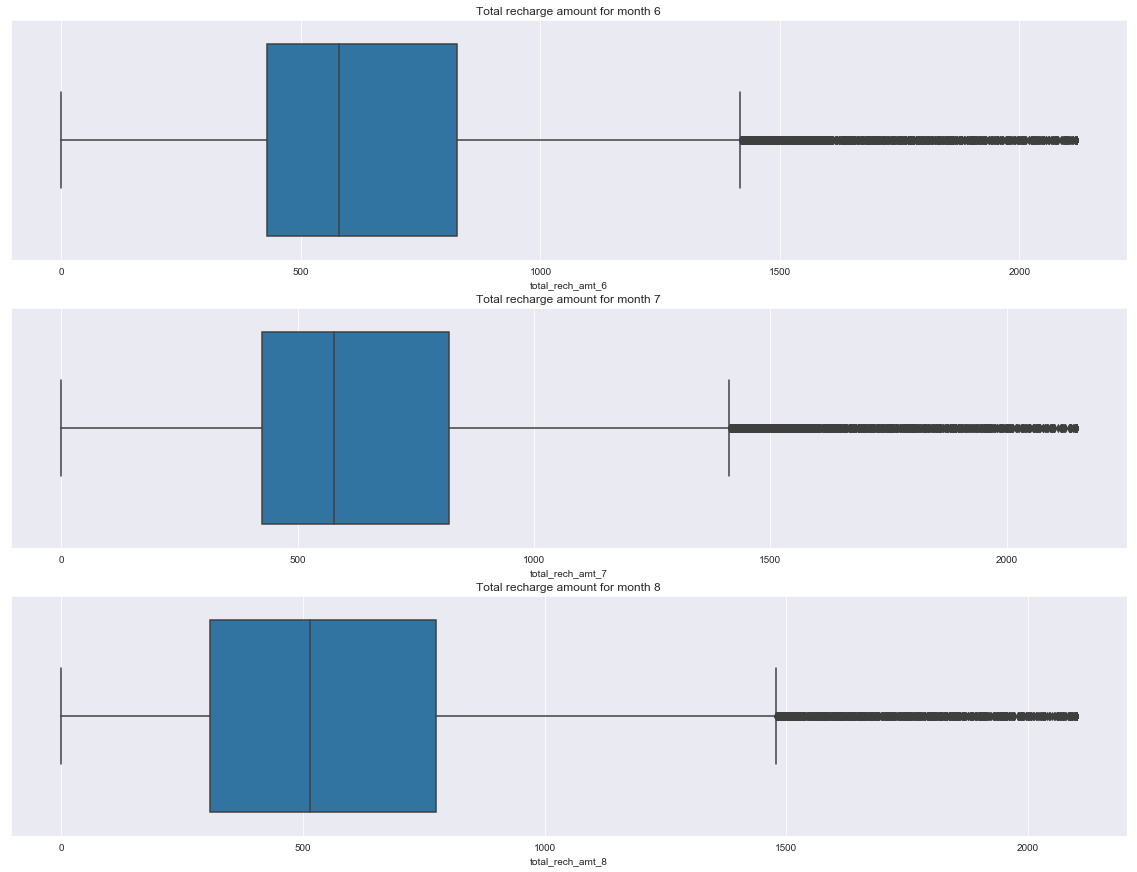

In [89]:
fig,axis = plt.subplots(figsize = (20,15), nrows= 3, ncols = 1)


sns.boxplot(x =df_2["total_rech_amt_6"],ax = axis[0])
sns.boxplot(x =df_2["total_rech_amt_7"],ax = axis[1])
sns.boxplot(x =df_2["total_rech_amt_8"],ax = axis[2])


axis[0].set_title("Total recharge amount for month 6")
axis[1].set_title("Total recharge amount for month 7")
axis[2].set_title("Total recharge amount for month 8")

axis[0].tick_params(axis='both', which='major', labelsize=10)
axis[1].tick_params(axis='both', which='major', labelsize=10)
axis[2].tick_params(axis='both', which='major', labelsize=10)

fig.show()

##### The distributions' tails have been reduced by the outlier treatment.

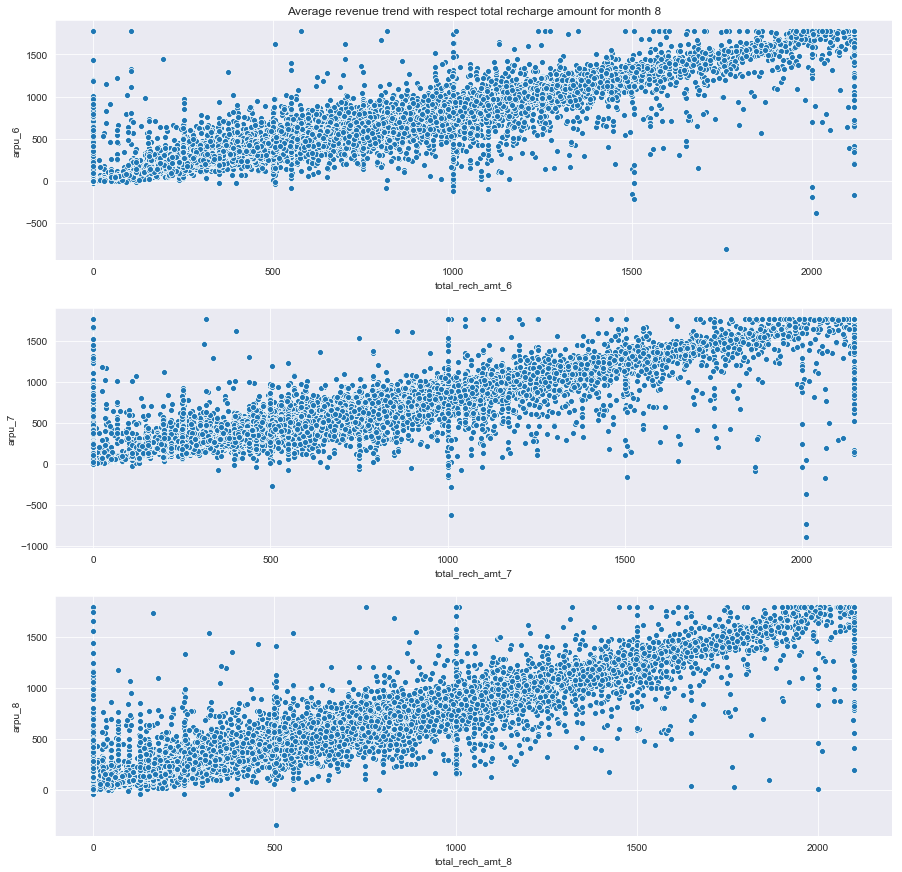

In [90]:
fig,axis = plt.subplots(nrows= 3, ncols = 1, figsize = (15,15))

sns.scatterplot(y = df_2["arpu_6"], x =df_2["total_rech_amt_6"],ax = axis[0])
sns.scatterplot(y = df_2["arpu_7"], x =df_2["total_rech_amt_7"],ax = axis[1])
sns.scatterplot(y = df_2["arpu_8"], x =df_2["total_rech_amt_8"],ax = axis[2])

axis[0].set_title("Average revenue trend with respect total recharge amount for month 6")
axis[0].set_title("Average revenue trend with respect total recharge amount for month 7")
axis[0].set_title("Average revenue trend with respect total recharge amount for month 8")

axis[0].tick_params(axis='both', which='major', labelsize=10)
axis[1].tick_params(axis='both', which='major', labelsize=10)
axis[2].tick_params(axis='both', which='major', labelsize=10)

fig.show()

##### We can see the relation between the arpu and total_rech_amt variables much more clearly.

In [91]:
#Triggering garbage collection

gc.collect()

10530

### 4c. Dervied Variables

Before deriving new variables, let's make a few changes to the new dataframe.

In [92]:
#Dropping the columns that were created for filtering high-value customers

df_2 = df_2.drop(['total_recharge_amt_6', 'total_recharge_amt_7', 'avg_recharge_amt_good_phase'], axis=1)

In [93]:
#Checking the number of columns in the dataframe
df_2.shape

(29082, 163)

#### A high ratio of total amount recharged and the maximum recharge amount could reflect a customer's confidence that they will continue with the telecom provider. A low ratio might indicate that the customer is only recharging for the short term.

In [94]:
#Creating the ratio columns for the recharge amount variables

df_2['ratio_total_max_rech_6'] = df_2['total_rech_amt_6']/df_2['max_rech_amt_6']
df_2['ratio_total_max_rech_7'] = df_2['total_rech_amt_7']/df_2['max_rech_amt_7']
df_2['ratio_total_max_rech_8'] = df_2['total_rech_amt_8']/df_2['max_rech_amt_8']

In [95]:
#Creating the ratio columns for the data recharge variables

df_2['ratio_total_max_rech_data_6'] = df_2['total_rech_data_6']/df_2['max_rech_data_6']
df_2['ratio_total_max_rech_data_7'] = df_2['total_rech_data_7']/df_2['max_rech_data_7']
df_2['ratio_total_max_rech_data_8'] = df_2['total_rech_data_8']/df_2['max_rech_data_8']

In [96]:
#Since we're getting null values in the ratio columns due to zero values in the max recharge columns, we can set these 
#null values to zero

df_2['ratio_total_max_rech_6'][df_2['ratio_total_max_rech_6'].isnull()] = 0
df_2['ratio_total_max_rech_7'][df_2['ratio_total_max_rech_7'].isnull()] = 0
df_2['ratio_total_max_rech_8'][df_2['ratio_total_max_rech_8'].isnull()] = 0

df_2['ratio_total_max_rech_data_6'][df_2['ratio_total_max_rech_data_6'].isnull()] = 0
df_2['ratio_total_max_rech_data_7'][df_2['ratio_total_max_rech_data_7'].isnull()] = 0
df_2['ratio_total_max_rech_data_8'][df_2['ratio_total_max_rech_data_8'].isnull()] = 0

##### Let's convert the datetime columns.

In [97]:
#Subtracting the date of last data recharge from the last date of the month and extracting this difference in days

df_2['date_of_last_rech_data_6'] = df_2.apply(lambda x: relativedelta(x.last_date_of_month_6, x.date_of_last_rech_data_6).days, axis=1)
df_2['date_of_last_rech_data_7'] = df_2.apply(lambda x: relativedelta(x.last_date_of_month_7, x.date_of_last_rech_data_7).days, axis=1)
df_2['date_of_last_rech_data_8'] = df_2.apply(lambda x: relativedelta(x.last_date_of_month_8, x.date_of_last_rech_data_8).days, axis=1)

In [98]:
#Subtracting the date of last data recharge from the last date of the month and extracting this difference in days

df_2['date_of_last_rech_6'] = df_2.apply(lambda x: relativedelta(x.last_date_of_month_6, x.date_of_last_rech_6).days, axis=1)
df_2['date_of_last_rech_7'] = df_2.apply(lambda x: relativedelta(x.last_date_of_month_7, x.date_of_last_rech_7).days, axis=1)
df_2['date_of_last_rech_8'] = df_2.apply(lambda x: relativedelta(x.last_date_of_month_8, x.date_of_last_rech_8).days, axis=1)

In [99]:
#Dropping a few unnecessary datetime and customer info columns

df_2 = df_2.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'mobile_number', 'circle_id'], axis=1)

In [100]:
#Checking the number of columns in the dataframe
df_2.shape

(29082, 164)

In [101]:
#Triggering garbage collection

gc.collect()

67

# 5. Modeling

In [102]:
#Splitting the data into train and test sets

test_df,train_df = train_test_split(df_2, test_size = .7, random_state = 100)
train_df.shape

(20358, 164)

In [103]:
#Creating the y_train and y_test variables
y_train = train_df["churn"]
y_test = test_df["churn"]

#Copying the predictor variables into the X_train and X_test dataframes

X_train = train_df[train_df.columns[train_df.columns !="churn"]]
X_test  = test_df[test_df.columns[test_df.columns !="churn"]]
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,ratio_total_max_rech_6,ratio_total_max_rech_7,ratio_total_max_rech_8,ratio_total_max_rech_data_6,ratio_total_max_rech_data_7,ratio_total_max_rech_data_8
23435,629.127,438.165,487.246,112.89,81.76,70.73,1074.16,711.34,901.43,0.00,0.00,0.00,0.00,0.00,0.00,41.83,10.8600,16.060,71.74,41.41,69.96,5.26,0.00,0.00,0.00,0.00,0.00,118.84,52.2800,86.03,71.06,70.89,54.66,997.14,669.93,830.93,0.00,0.0,0.00,1068.21,740.83,885.59,0.0,0.0,0.0,0.00,0.00,0.53,0.00,0.0,0.0,1187.06,793.11,972.16,8.56,6.24,5.69,25.31,86.78,46.84,1.30,0.00,0.00,35.18,93.03,52.54,4.98,0.03,0.00,4.61,28.91,19.23,0.00,0.0,0.00,9.59,28.94,19.23,45.68,121.98,93.54,0.41,0.0,0.0,0.00,0.00,20.83,0.48,0.00,0.93,17,6,8,846,390.0,616,110,250,300,0,0,6,110,20,130,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,760,0.00,0.00,0.00,7.690909,1.560000,2.053333,0.000000,0.000000,0.000000
58351,289.950,449.633,736.408,585.03,1162.91,1796.49,28.93,15.36,30.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.7300,0.000,3.33,2.54,0.98,0.00,0.00,0.00,0.00,0.00,0.00,3.33,6.2800,0.98,585.03,1159.18,1796.49,25.59,12.81,29.99,0.00,0.0,0.00,610.63,1171.99,1826.49,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,613.96,1178.28,1827.48,1.93,29.41,0.36,43.44,13.48,5.16,1.63,0.00,0.00,47.01,42.89,5.53,6.04,1.16,42.04,5.01,9.61,2.31,0.00,0.0,0.00,11.06,10.78,44.36,74.84,86.96,50.28,0.00,0.0,0.0,16.70,32.73,0.00,0.06,0.55,0.38,5,11,14,336,588.0,812,110,128,144,0,1,3,50,128,61,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0

#### Performing standard scaling on the train and test data

In [104]:
#Creating an object of the MinMaxScaler class

min_max_scaler = MinMaxScaler()


#Scaling the training data

X_train_scaled = min_max_scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)

X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,20358.0,0.532013,0.120532,0.0,0.453663,0.503856,0.582243,1.0
arpu_7,20358.0,0.548734,0.116083,0.0,0.473188,0.520613,0.596684,1.0
arpu_8,20358.0,0.301446,0.188097,0.0,0.179858,0.267948,0.383797,1.0
onnet_mou_6,20358.0,0.137215,0.188684,0.0,0.019998,0.061740,0.171195,1.0
onnet_mou_7,20358.0,0.138429,0.192513,0.0,0.019872,0.060579,0.171205,1.0
onnet_mou_8,20358.0,0.122246,0.185244,0.0,0.013070,0.048714,0.142722,1.0
offnet_mou_6,20358.0,0.186086,0.186623,0.0,0.063535,0.129667,0.240934,1.0
offnet_mou_7,20358.0,0.185871,0.187772,0.0,0.062010,0.126613,0.240210,1.0
offnet_mou_8,20358.0,0.174858,0.190845,0.0,0.046953,0.117377,0.232461,1.0
roam_ic_mou_6,20358.0,0.043613,0.149347,0.0,0.000000,0.000000,0.000000,1.0


##### Scaling the test data

In [105]:
#Using the same steps to scale the test data

X_test_scaled  = min_max_scaler.transform(X_test)
X_test_scaled  = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,8724.0,0.531518,0.120045,0.232521,0.453928,0.503145,0.581242,1.000000
arpu_7,8724.0,0.547964,0.116598,0.103067,0.472801,0.519720,0.591607,1.000000
arpu_8,8724.0,0.299204,0.186776,-0.164195,0.180050,0.264246,0.378080,1.000000
onnet_mou_6,8724.0,0.137244,0.193148,0.000000,0.020296,0.059406,0.168973,1.000000
onnet_mou_7,8724.0,0.137288,0.194560,0.000000,0.019142,0.056961,0.167260,1.000000
onnet_mou_8,8724.0,0.122969,0.188434,0.000000,0.013422,0.046820,0.143644,1.000000
offnet_mou_6,8724.0,0.184363,0.184549,0.000000,0.062782,0.129408,0.233384,1.000000
offnet_mou_7,8724.0,0.182737,0.181119,0.000000,0.060670,0.129616,0.237303,1.000000
offnet_mou_8,8724.0,0.170265,0.181862,0.000000,0.045173,0.114223,0.230616,1.000000
roam_ic_mou_6,8724.0,0.043653,0.147538,0.000000,0.000000,0.000000,0.000000,1.000000


### Performing PCA to reduce the number of features 

#### Let's compare variance with number of features to identify the number of features required for PCA. The number of features we select should explain 98% of the variance in the data.

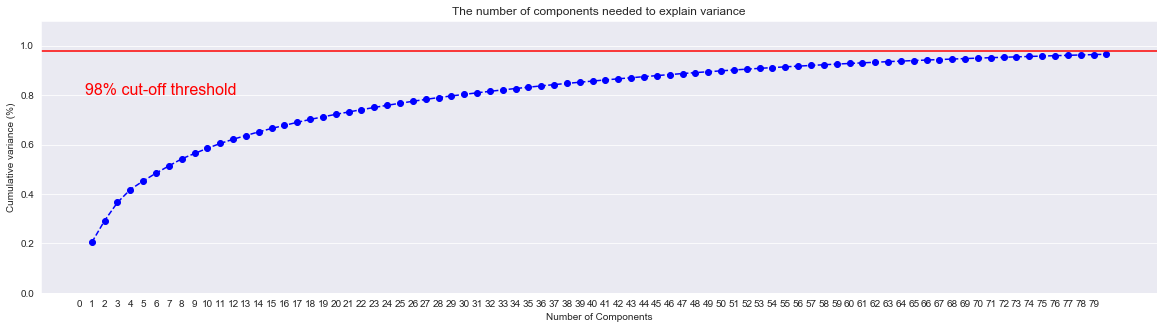

In [106]:
#Instantiating an object of the PCA class

pca = PCA().fit(X_train_scaled)

#Plotting the number of components against the cumulative variance

plt.rcParams["figure.figsize"] = (20,5)

lenth_X_y=80

fig, ax = plt.subplots()
xi = np.arange(1, len(pca.explained_variance_ratio_)+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi[:lenth_X_y], y[:lenth_X_y], marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, lenth_X_y, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.98, color='r', linestyle='-')
plt.text(0.5, 0.80, '98% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


#### From the above graph, we can see that 56 principal components explain 98% of the variance in our data. Let's choose 53 features for PCA.

In [107]:
#Transforming the X_train and X_test data using 53 principal components

PCA_df = PCA(n_components = 53)
PCA_df.fit(X_train_scaled)
pca_transformed_train_X = PCA_df.transform(X_train_scaled)
pca_transformed_test_X  = PCA_df.transform(X_test_scaled)

## Model 1: Decision Tree (using PCA)

In [108]:
#Fitting a decision tree with default values


#Instantiate thee DecisionTreeClassifier

decision_tree_default = DecisionTreeClassifier(criterion='gini',
                                      max_depth=5,
                                        max_features='sqrt',
                                       max_leaf_nodes=50,
                                       min_samples_leaf=100,
                                       random_state=100,
                                      )

#Fit the decision tree using the pca transformed data

decision_tree_default.fit(pca_transformed_train_X, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='sqrt', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [109]:
#Checking the accuracy score on the training data

decision_tree_default.score(pca_transformed_train_X,y_train)

0.9157088122605364

In [110]:
#Checking the accuracy score on the test data

decision_tree_default.score(pca_transformed_test_X, y_test)

0.9180421824850986

In [111]:
#Making predictions using this model

y_pred_dtree_default = decision_tree_default.predict(pca_transformed_test_X)

#Creating a confusion matrix to evaluate the model's performance
print(confusion_matrix(y_test, y_pred_dtree_default))

#the y-axis represents predicted values and x-axis represents actual values

[[7926   87]
 [ 628   83]]


#### Although the accuracy of the model is high, the confusion matrix shows that the model tends to predict 'no churn' even when customers are churning. Let's set class_weight='balanced' and tune the hyperparameters.

### Using gridsearch for tuning the decision tree's hyperparameters

##### Note: The below block takes roughly ten minutes to execute.

In [112]:
# Create the parameter grid 
param_grid = {
    'max_depth': [4,6,8,10,12],
    'min_samples_leaf': [10,20,40,80,160,240,320,640],
    'max_leaf_nodes': [10,20,40,80,160],
    'criterion': ['entropy', 'gini'],
    'max_features' : ['auto', 'log2']
}

#Specify the number of folds
n_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# Instantiate the grid search model
dtree_pca_grid = DecisionTreeClassifier(random_state=100, class_weight='balanced')
grid_search_dtree_pca = GridSearchCV(estimator = dtree_pca_grid, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=-1)

#Note: Setting scoring='recall' doesn't improve the model's performance significantly.

# Fit the grid search to the data
grid_search_dtree_pca.fit(pca_transformed_train_X, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  5.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 6, 8, 10, 12], 'min_samples_leaf': [10, 20, 40, 80, 160, 240, 320, 640], 'max_leaf_nodes': [10, 20, 40, 80, 160], 'criterion': ['entropy', 'gini'], 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [113]:
# Printing the best accuracy score and hyperparameters
print("best accuracy", grid_search_dtree_pca.best_score_)
print(grid_search_dtree_pca.best_estimator_)

best accuracy 0.7989979369289714
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=160,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


### Decison tree after hyperparameter tuning

In [114]:
#Fitting a decision tree with the tuned hyperparameters

decision_tree_pca_final = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=12,
            max_features='auto', max_leaf_nodes=160,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

decision_tree_pca_final.fit(pca_transformed_train_X, y_train)

#Checking the accuracy of the new model on the training data
decision_tree_pca_final.score(pca_transformed_train_X, y_train)

0.8272423617251203

In [115]:
#Checking the accuracy of the new model on the test data

accur_dtree = decision_tree_pca_final.score(pca_transformed_test_X, y_test)
print(accur_dtree)

0.7933287482806052


In [116]:
#Making predictions using this model
y_pred_dtree_final = decision_tree_pca_final.predict(pca_transformed_test_X)

#Creating a confusion matrix for the new model
cm_dtree = confusion_matrix(y_test, y_pred_dtree_final)
print(cm_dtree)

[[6409 1604]
 [ 199  512]]


#### Although this model has lower accuracy, it is significantly better at predicting an actual churn as churn (although this has also increased the number of false positives). Since the telecom service provider prefers to retain existing customers, this model is better suited for their needs.

Note: We haven't used scoring='recall' in the grid search, as the model's performance is not significantly improved. Here are some details on the performance of the model created with scoring='recall':
Training data accuracy: 67%, test data accuracy: 67.5%
Confusion matrix: 
(row 1) 5309,    2704
(row 2) 131,     580

Although the number of true positives has gone up, the TP performance increase results in ~15 additional FO for every new TP identified. It might be less expensive for the telecom company to retain 1 existing customer, but probably not at the cost of offering incentives to 15 others who would not have churned.

In [117]:
#Triggering garbage collection

gc.collect()

1720

## Model 2: Gradient Boosting
1. Finding best hyper parameter ( hyper parameter tuning)
2. applying best hyper paramer

#### Note: The block below takes about 10 minutes to execute.

In [118]:
#from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(random_state=100)
pipe = Pipeline(steps=[('grad_boost', grad_boost)])



# Create lists of parameter for Decision Tree Classifier
loss =['deviance', 'exponential']
learning_rate =[0.2,0.5]#,0.4,0.8] #learning_rate =[0.1,0.2,0.4,0.8] #
n_estimators = [20]
criterion=['friedman_mse','mse']#,'mae']
min_samples_split =[80]#[10,20,40,80,160,320,640,1280]
min_samples_leaf =[160]#[10,20,40,80,160,320,640,1280]
max_depth = [4,8,12]

max_features = ['auto', 'sqrt']#, 'log2']

max_leaf_nodes = [80]#,160,320,640,1280]


# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(grad_boost__loss=loss,
                  grad_boost__learning_rate=learning_rate,
                  grad_boost__n_estimators=n_estimators,
                  grad_boost__criterion = criterion,
                  grad_boost__min_samples_split=min_samples_split,
                  grad_boost__max_depth =max_depth,
                  grad_boost__max_features =max_features,
                  grad_boost__min_samples_leaf =min_samples_leaf,
                  grad_boost__max_leaf_nodes=max_leaf_nodes)

# Conduct Parameter Optmization With Pipeline
# Create a grid search object
grad_boost_classifier = GridSearchCV(pipe, parameters, verbose=1)

print ("1")

# Fit the grid search
grad_boost_classifier.fit(pca_transformed_train_X, y_train)

print ("2")
#View The Best Parameters
print('Best Loos:', grad_boost_classifier.best_estimator_.get_params()['grad_boost__loss'])
print('Best learning_rate:', grad_boost_classifier.best_estimator_.get_params()['grad_boost__learning_rate'])

print('Best n_estimators:', grad_boost_classifier.best_estimator_.get_params()['grad_boost__n_estimators'])

print('Best criterion:', grad_boost_classifier.best_estimator_.get_params()['grad_boost__criterion'])

print('Best min_samples_split:', grad_boost_classifier.best_estimator_.get_params()['grad_boost__max_depth'])

print('Best max_depth:', grad_boost_classifier.best_estimator_.get_params()['grad_boost__max_leaf_nodes'])

print('Best max_features:', grad_boost_classifier.best_estimator_.get_params()['grad_boost__max_features'])
print('Best max_leaf_nodes:', grad_boost_classifier.best_estimator_.get_params()['grad_boost__max_leaf_nodes'])

1
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  7.6min finished


2
Best Loos: deviance
Best learning_rate: 0.5
Best n_estimators: 20
Best criterion: friedman_mse
Best min_samples_split: 4
Best max_depth: 80
Best max_features: auto
Best max_leaf_nodes: 80


In [119]:
# Printing the best accuracy score and hyperparameters
print("best accuracy", grad_boost_classifier.best_score_)
print(grad_boost_classifier.best_estimator_.get_params()['grad_boost'])

best accuracy 0.9244031830238727
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=4,
              max_features='auto', max_leaf_nodes=80,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=160, min_samples_split=80,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              n_iter_no_change=None, presort='auto', random_state=100,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [120]:
grad_boost_final = GradientBoostingClassifier(learning_rate =.2,
                                             max_depth = 12,
                                             n_estimators = 20,
                                             criterion= "mse",
                                             min_samples_split = 80,
                                             min_samples_leaf = 160,
                                             max_features ="auto",
                                             max_leaf_nodes = 80,
                                            random_state=100
                                             )

grad_boost_final.fit(pca_transformed_train_X,y_train)

grad_boost_final.score(pca_transformed_train_X,y_train)

0.9561843010118872

In [121]:
grad_boost_final.score(pca_transformed_test_X,y_test)

0.9260660247592847

In [122]:
#Making predictions using this model
y_pred_grad_boost_final = grad_boost_final.predict(pca_transformed_test_X)

#Creating a confusion matrix for the new model
print(confusion_matrix(y_test, y_pred_grad_boost_final))

[[7838  175]
 [ 470  241]]


#### This model has very high accuracy, but it tends to classify people as not churn. It's specificity is very low (~33).

In [123]:
#Triggering garbage collection

gc.collect()

106

## Model 3: Lasso Regression

In [124]:
#Instantiate the lasso regression class
lasso_pca_grid = Lasso(random_state=100)


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50, 100]}

#Setting number of folds for cv
folds=5

# Performing grid search
grid_search_lasso_pca = GridSearchCV(estimator = lasso_pca_grid, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1
                        )            

grid_search_lasso_pca.fit(pca_transformed_train_X, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   18.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=100,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [125]:
# Printing the best accuracy score and hyperparameters
print("best accuracy", grid_search_lasso_pca.best_score_)
print(grid_search_lasso_pca.best_estimator_)

best accuracy -0.1530566932207683
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=100,
   selection='cyclic', tol=0.0001, warm_start=False)


In [126]:
#Fitting the lasso regression model with the optimal alpha value

alpha = 0.01

lasso_pca_final = Lasso(alpha=alpha, random_state=100)

lasso_pca_final.fit(pca_transformed_train_X, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=100,
   selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
#Checking the number of variables in the lasso model

lasso_pca_final.coef_

array([-0.02421593, -0.05595909, -0.00462361,  0.        ,  0.        ,
        0.        ,  0.08504317, -0.02107498, -0.        ,  0.        ,
        0.04416834,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ])

#### There are only six principal components in the lasso model.

In [128]:
#Creating a dataframe and storing the predicted churn probability

y_train_pred = pd.DataFrame({'Churn':y_train, 'Churn_Prob':lasso_pca_final.predict(pca_transformed_train_X)})
y_train_pred.head()

,Churn,Churn_Prob
23435,0,0.129555
58351,0,0.102348
133,0,-0.018092
53006,0,0.116454
30832,1,0.188717


In [129]:
#To determine the ideal cutoff point, let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
23435,0,0.129555,1,1,0,0,0,0,0,0,0,0
58351,0,0.102348,1,1,0,0,0,0,0,0,0,0
133,0,-0.018092,0,0,0,0,0,0,0,0,0,0
53006,0,0.116454,1,1,0,0,0,0,0,0,0,0
30832,1,0.188717,1,1,0,0,0,0,0,0,0,0


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred.Churn, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.158758  0.997753  0.078372
0.1   0.1  0.638029  0.874157  0.615405
0.2   0.2  0.915316  0.152247  0.988427
0.3   0.3  0.912614  0.000562  1.000000
0.4   0.4  0.912565  0.000000  1.000000
0.5   0.5  0.912565  0.000000  1.000000
0.6   0.6  0.912565  0.000000  1.000000
0.7   0.7  0.912565  0.000000  1.000000
0.8   0.8  0.912565  0.000000  1.000000
0.9   0.9  0.912565  0.000000  1.000000


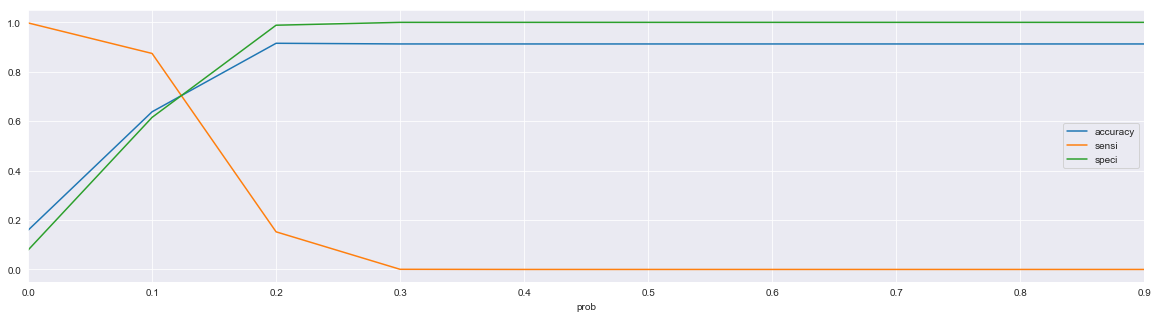

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Let's use 0.13 as the cut off value.

In [132]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.13 else 0
y_train_pred['predicted'] = y_train_pred.Churn_Prob.map(lambda x: 1 if x > 0.13 else 0)
y_train_pred.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
23435,0,0.129555,1,1,0,0,0,0,0,0,0,0,0
58351,0,0.102348,1,1,0,0,0,0,0,0,0,0,0
133,0,-0.018092,0,0,0,0,0,0,0,0,0,0,0
53006,0,0.116454,1,1,0,0,0,0,0,0,0,0,0
30832,1,0.188717,1,1,0,0,0,0,0,0,0,0,1


In [133]:
#Creating a dataframe for the test data

#Creating a dataframe and storing the predicted churn probability

y_test_pred = pd.DataFrame({'Churn':y_test, 'Churn_Prob':lasso_pca_final.predict(pca_transformed_test_X)})
y_test_pred.head()

,Churn,Churn_Prob
10513,0,0.121664
64486,0,0.114166
11397,0,0.061678
62678,0,0.111442
53930,0,0.102812


In [134]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.13 else 0
y_test_pred['predicted'] = y_test_pred.Churn_Prob.map(lambda x: 1 if x > 0.13 else 0)
y_test_pred.head()

,Churn,Churn_Prob,predicted
10513,0,0.121664,0
64486,0,0.114166,0
11397,0,0.061678,0
62678,0,0.111442,0
53930,0,0.102812,0


In [135]:
#Checking the accuracy score for the training data

cm1 = confusion_matrix(y_train_pred['Churn'], y_train_pred['predicted'])
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print(accuracy1)

0.8173199724923863


In [136]:
#Checking the accuracy score and the confusion matrix for the test data

cm2 = confusion_matrix(y_test_pred['Churn'], y_test_pred['predicted'])
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print(accuracy2)
print(cm2)

0.8105226960110041
[[6567 1446]
 [ 207  504]]


As we can see, this has a very similar performance to the decision tree model. Let's compare the sensitivity and precision scores of the two models.

### Comparing model performance on test data

In [137]:
sens_dtree = cm_dtree[1,1] / float(cm_dtree[1,1] + cm_dtree[1,0])
pres_dtree = cm_dtree[1,1] / float(cm_dtree[1,1] + cm_dtree[0,1])
print("Sensitivity of decision tree model: ", round(sens_dtree*100,2))
print("Precision of decision tree model: ", round(pres_dtree*100,2))
print("Accuracy of decision tree model: ", round(accur_dtree*100,2))

Sensitivity of decision tree model:  72.01
Precision of decision tree model:  24.2
Accuracy of decision tree model:  79.33


In [138]:
sens_lasso = cm2[1,1] / float(cm2[1,1] + cm2[1,0])
pres_lasso = cm2[1,1] / float(cm2[1,1] + cm2[0,1])
print("Sensitivity of lasso regression model: ", round(sens_lasso*100,2))
print("Precision of lasso regression model: ", round(pres_lasso*100,2))
print("Accuracy of lasso regression model: ", round(accuracy2*100,2))

Sensitivity of lasso regression model:  70.89
Precision of lasso regression model:  25.85
Accuracy of lasso regression model:  81.05


### Preferred model: Lasso regression

#### Since the lasso regression model uses only 6 principal components, has closer training and test accuracy scores, and similar accuracy, sensitivity, and precision scores as the decision tree model, we can use the lasso regression model.

In [139]:
#Triggering garbage collection

gc.collect()

2941

## Building models to determine the most important predictor variables

### Using SelectKBest for feature selection

In [140]:
number_of_feature =30

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=number_of_feature)
fit = bestfeatures.fit(X_train_scaled,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_scaled.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['features','Score']  
required_df = featureScores.nlargest(number_of_feature,'Score')
required_df

,features,Score
152,fb_user_8,336.509102
80,total_ic_mou_8,214.615160
65,loc_ic_mou_8,208.696828
29,loc_og_mou_8,202.855139
20,loc_og_t2m_mou_8,197.897317
59,loc_ic_t2m_mou_8,197.408400
95,total_rech_amt_8,187.647842
53,total_og_mou_8,164.957055
2,arpu_8,153.044967
140,monthly_2g_8,141.978995


In [141]:
#Making a list of columns for logistic regression

columns_for_LR = required_df["features"].tolist()
len(columns_for_LR)

30

## Model 1 (without PCA): Logistic Regression

In [142]:
#Adding a constant as statsmodels doesn't add one by itself

X_train_sm = sm.add_constant(X_train_scaled[columns_for_LR])


#Using logit to build a logistic regression model since we're more interested in the features in the model

lr = sm.Logit(y_train, X_train_sm).fit()

lr.summary()

Optimization terminated successfully.
         Current function value: 0.194307
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20327
Method:                           MLE   Df Model:                           30
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3448
Time:                        19:54:22   Log-Likelihood:                -3955.7
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5117      0.082     -6.256      0.000      -0.672      -0.351
fb_user_8              -0.7221      0.182     -3.969      0.000      -1.079      -0.365
total_ic_mou_8         -3.0153      0.804     -3.751      0.000      -4.591      -1.440
loc_ic_mou_8            7.8035      2.966      2.631      0.009       1.990      13.617
loc_og_mou_8            3.1689      3.069      1.032      0.302      -2.847       9.185
loc_og_t2m_mou_8       -4.7616      2.092     -2.276      0.023      -8.862      -0.662
loc_ic_t2m_mou_8       -9.7520      2.052     -4.752      0.000     -13.775      -5.729
total_rech_amt_8        2.6911      0.654      4.118      0.000       1.410       3.972
total_og_mou_8         -3.4337      0.449     -7.645      0.000      -4.314      -2.553
arpu_8                 -0.3508      0.613     -0.573      0.567      -1.552       0.850
monthly_2g_8           -0.8789      0.242     -3.630      0.000      -1.353      -0.404
std_og_mou_6            1.6939      1.050      1.613      0.107      -0.364       3.752
last_day_rch_amt_8     -3.3507      0.305    -10.975      0.000      -3.949      -2.752
av_rech_amt_data_8     -0.9452      0.978     -0.966      0.334      -2.863       0.973
max_rech_data_8         0.1084      0.738      0.147      0.883      -1.338       1.554
roam_og_mou_7           0.4023      0.177      2.272      0.023       0.055       0.749
offnet_mou_8           -0.0554      0.401     -0.138      0.890      -0.842       0.731
loc_ic_t2t_mou_8       -5.3029      1.654     -3.207      0.001      -8.544      -2.062
roam_og_mou_8           0.6227      0.209      2.974      0.003       0.212       1.033
date_of_last_rech_8     1.7491      0.154     11.359      0.000       1.447       2.051
loc_og_t2t_mou_8       -2.2199      2.129     -1.043      0.297      -6.392       1.953
total_rech_data_8      -0.5286      1.286     -0.411      0.681      -3.048       1.991
loc_ic_t2f_mou_8       -3.3599      0.754     -4.456      0.000      -4.838      -1.882
total_rech_num_8       -3.0711      0.341     -9.008      0.000      -3.739      -2.403
std_og_t2m_mou_6       -0.3085      0.813     -0.380      0.704      -1.902       1.285
max_rech_amt_8         -1.4944      0.390     -3.832      0.000      -2.259      -0.730
vol_3g_mb_8            -1.0073      0.566     -1.780      0.075      -2.117       0.102
fb_user_7               0.2989      0.084      3.558      0.000       0.134       0.464
count_rech_2g_8        -0.2547      0.979     -0.260      0.795      -2.174       1.665
std_og_t2t_mou_6       -0.6664      0.792     -0.842      0.400      -2.218       0.885
loc_og_t2f_mou_8       -0.5871      0.462     -1.271      0.204      -1.492       0.318
=======================================================================================
"""

In [143]:
#Dropping the variable offnet_mou_8 and fitting the Logit model

X_train_sm = X_train_sm.drop(['offnet_mou_8'], axis=1)

lr = sm.Logit( y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.194308
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20328
Method:                           MLE   Df Model:                           29
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3448
Time:                        19:54:22   Log-Likelihood:                -3955.7
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5112      0.082     -6.256      0.000      -0.671      -0.351
fb_user_8              -0.7217      0.182     -3.968      0.000      -1.078      -0.365
total_ic_mou_8         -3.0192      0.803     -3.758      0.000      -4.594      -1.444
loc_ic_mou_8            7.8044      2.966      2.631      0.009       1.991      13.618
loc_og_mou_8            3.1913      3.065      1.041      0.298      -2.816       9.199
loc_og_t2m_mou_8       -4.7931      2.080     -2.305      0.021      -8.869      -0.717
loc_ic_t2m_mou_8       -9.7506      2.052     -4.751      0.000     -13.773      -5.728
total_rech_amt_8        2.6882      0.653      4.115      0.000       1.408       3.968
total_og_mou_8         -3.4690      0.370     -9.377      0.000      -4.194      -2.744
arpu_8                 -0.3538      0.612     -0.578      0.563      -1.554       0.846
monthly_2g_8           -0.8785      0.242     -3.629      0.000      -1.353      -0.404
std_og_mou_6            1.6894      1.049      1.610      0.107      -0.367       3.746
last_day_rch_amt_8     -3.3496      0.305    -10.975      0.000      -3.948      -2.751
av_rech_amt_data_8     -0.9438      0.978     -0.965      0.335      -2.861       0.974
max_rech_data_8         0.1067      0.738      0.145      0.885      -1.339       1.552
roam_og_mou_7           0.4018      0.177      2.269      0.023       0.055       0.749
loc_ic_t2t_mou_8       -5.3002      1.653     -3.206      0.001      -8.541      -2.060
roam_og_mou_8           0.6156      0.203      3.033      0.002       0.218       1.013
date_of_last_rech_8     1.7485      0.154     11.361      0.000       1.447       2.050
loc_og_t2t_mou_8       -2.2203      2.129     -1.043      0.297      -6.392       1.952
total_rech_data_8      -0.5286      1.285     -0.411      0.681      -3.048       1.991
loc_ic_t2f_mou_8       -3.3586      0.754     -4.454      0.000      -4.836      -1.881
total_rech_num_8       -3.0707      0.341     -9.007      0.000      -3.739      -2.402
std_og_t2m_mou_6       -0.3126      0.812     -0.385      0.700      -1.904       1.279
max_rech_amt_8         -1.4927      0.390     -3.829      0.000      -2.257      -0.729
vol_3g_mb_8            -1.0064      0.566     -1.778      0.075      -2.116       0.103
fb_user_7               0.2987      0.084      3.556      0.000       0.134       0.463
count_rech_2g_8        -0.2552      0.979     -0.261      0.794      -2.174       1.664
std_og_t2t_mou_6       -0.6564      0.788     -0.833      0.405      -2.201       0.888
loc_og_t2f_mou_8       -0.5901      0.461     -1.279      0.201      -1.494       0.314
=======================================================================================
"""

In [144]:
#Dropping the variable count_rech_2g_8 and fitting the Logit model

X_train_sm = X_train_sm.drop(['count_rech_2g_8'], axis=1)

lr = sm.Logit( y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.194310
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20329
Method:                           MLE   Df Model:                           28
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3448
Time:                        19:54:22   Log-Likelihood:                -3955.8
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5113      0.082     -6.258      0.000      -0.671      -0.351
fb_user_8              -0.7167      0.181     -3.966      0.000      -1.071      -0.363
total_ic_mou_8         -3.0209      0.804     -3.759      0.000      -4.596      -1.446
loc_ic_mou_8            7.8040      2.965      2.632      0.008       1.992      13.616
loc_og_mou_8            3.1983      3.065      1.043      0.297      -2.809       9.206
loc_og_t2m_mou_8       -4.7997      2.080     -2.308      0.021      -8.876      -0.724
loc_ic_t2m_mou_8       -9.7495      2.052     -4.752      0.000     -13.771      -5.728
total_rech_amt_8        2.6909      0.653      4.121      0.000       1.411       3.971
total_og_mou_8         -3.4728      0.370     -9.396      0.000      -4.197      -2.748
arpu_8                 -0.3489      0.612     -0.570      0.569      -1.548       0.850
monthly_2g_8           -0.9006      0.227     -3.973      0.000      -1.345      -0.456
std_og_mou_6            1.6921      1.049      1.613      0.107      -0.364       3.748
last_day_rch_amt_8     -3.3471      0.305    -10.974      0.000      -3.945      -2.749
av_rech_amt_data_8     -0.8600      0.925     -0.930      0.352      -2.672       0.952
max_rech_data_8         0.0857      0.733      0.117      0.907      -1.352       1.523
roam_og_mou_7           0.4023      0.177      2.272      0.023       0.055       0.749
loc_ic_t2t_mou_8       -5.3002      1.653     -3.207      0.001      -8.540      -2.061
roam_og_mou_8           0.6133      0.203      3.025      0.002       0.216       1.011
date_of_last_rech_8     1.7485      0.154     11.360      0.000       1.447       2.050
loc_og_t2t_mou_8       -2.2269      2.129     -1.046      0.295      -6.399       1.945
total_rech_data_8      -0.8386      0.499     -1.681      0.093      -1.816       0.139
loc_ic_t2f_mou_8       -3.3576      0.754     -4.454      0.000      -4.835      -1.880
total_rech_num_8       -3.0720      0.341     -9.011      0.000      -3.740      -2.404
std_og_t2m_mou_6       -0.3149      0.812     -0.388      0.698      -1.907       1.277
max_rech_amt_8         -1.4983      0.389     -3.851      0.000      -2.261      -0.736
vol_3g_mb_8            -0.9750      0.553     -1.764      0.078      -2.058       0.108
fb_user_7               0.2990      0.084      3.560      0.000       0.134       0.464
std_og_t2t_mou_6       -0.6583      0.788     -0.835      0.403      -2.203       0.886
loc_og_t2f_mou_8       -0.5900      0.461     -1.279      0.201      -1.494       0.314
=======================================================================================
"""

In [145]:
#Dropping the variable max_rech_data_8 and fitting the Logit model

X_train_sm = X_train_sm.drop(['max_rech_data_8'], axis=1)

lr = sm.Logit( y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.194310
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20330
Method:                           MLE   Df Model:                           27
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3448
Time:                        19:54:23   Log-Likelihood:                -3955.8
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5116      0.082     -6.266      0.000      -0.672      -0.352
fb_user_8              -0.7070      0.160     -4.408      0.000      -1.021      -0.393
total_ic_mou_8         -3.0215      0.804     -3.759      0.000      -4.597      -1.446
loc_ic_mou_8            7.8007      2.965      2.631      0.009       1.990      13.611
loc_og_mou_8            3.1946      3.065      1.042      0.297      -2.812       9.202
loc_og_t2m_mou_8       -4.7960      2.079     -2.307      0.021      -8.871      -0.721
loc_ic_t2m_mou_8       -9.7478      2.051     -4.752      0.000     -13.768      -5.727
total_rech_amt_8        2.6845      0.651      4.126      0.000       1.409       3.960
total_og_mou_8         -3.4717      0.370     -9.395      0.000      -4.196      -2.747
arpu_8                 -0.3475      0.612     -0.568      0.570      -1.547       0.851
monthly_2g_8           -0.8958      0.223     -4.017      0.000      -1.333      -0.459
std_og_mou_6            1.6902      1.049      1.611      0.107      -0.366       3.746
last_day_rch_amt_8     -3.3477      0.305    -10.977      0.000      -3.945      -2.750
av_rech_amt_data_8     -0.7793      0.612     -1.274      0.202      -1.978       0.419
roam_og_mou_7           0.4023      0.177      2.272      0.023       0.055       0.749
loc_ic_t2t_mou_8       -5.2990      1.653     -3.206      0.001      -8.538      -2.060
roam_og_mou_8           0.6142      0.203      3.031      0.002       0.217       1.011
date_of_last_rech_8     1.7488      0.154     11.365      0.000       1.447       2.050
loc_og_t2t_mou_8       -2.2241      2.128     -1.045      0.296      -6.396       1.948
total_rech_data_8      -0.8686      0.428     -2.031      0.042      -1.707      -0.030
loc_ic_t2f_mou_8       -3.3572      0.754     -4.454      0.000      -4.835      -1.880
total_rech_num_8       -3.0707      0.341     -9.012      0.000      -3.739      -2.403
std_og_t2m_mou_6       -0.3134      0.812     -0.386      0.700      -1.905       1.278
max_rech_amt_8         -1.4897      0.382     -3.900      0.000      -2.238      -0.741
vol_3g_mb_8            -0.9743      0.553     -1.763      0.078      -2.057       0.109
fb_user_7               0.2992      0.084      3.563      0.000       0.135       0.464
std_og_t2t_mou_6       -0.6568      0.788     -0.834      0.405      -2.201       0.888
loc_og_t2f_mou_8       -0.5904      0.461     -1.280      0.201      -1.495       0.314
=======================================================================================
"""

In [146]:
#Dropping the variable std_og_t2m_mou_6 and fitting the Logit model

X_train_sm = X_train_sm.drop(['std_og_t2m_mou_6'], axis=1)

lr = sm.Logit( y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.194314
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20331
Method:                           MLE   Df Model:                           26
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3448
Time:                        19:54:23   Log-Likelihood:                -3955.8
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5160      0.081     -6.380      0.000      -0.674      -0.357
fb_user_8              -0.7065      0.160     -4.405      0.000      -1.021      -0.392
total_ic_mou_8         -3.0233      0.804     -3.760      0.000      -4.599      -1.447
loc_ic_mou_8            7.7952      2.965      2.629      0.009       1.984      13.606
loc_og_mou_8            3.1992      3.065      1.044      0.297      -2.808       9.207
loc_og_t2m_mou_8       -4.7927      2.079     -2.305      0.021      -8.868      -0.717
loc_ic_t2m_mou_8       -9.7427      2.052     -4.749      0.000     -13.764      -5.722
total_rech_amt_8        2.6868      0.651      4.130      0.000       1.412       3.962
total_og_mou_8         -3.4770      0.369     -9.415      0.000      -4.201      -2.753
arpu_8                 -0.3414      0.611     -0.558      0.577      -1.540       0.857
monthly_2g_8           -0.8959      0.223     -4.018      0.000      -1.333      -0.459
std_og_mou_6            1.2913      0.179      7.211      0.000       0.940       1.642
last_day_rch_amt_8     -3.3475      0.305    -10.976      0.000      -3.945      -2.750
av_rech_amt_data_8     -0.7792      0.611     -1.274      0.203      -1.978       0.419
roam_og_mou_7           0.4032      0.177      2.278      0.023       0.056       0.750
loc_ic_t2t_mou_8       -5.2928      1.653     -3.203      0.001      -8.532      -2.054
roam_og_mou_8           0.6125      0.203      3.024      0.002       0.215       1.010
date_of_last_rech_8     1.7507      0.154     11.383      0.000       1.449       2.052
loc_og_t2t_mou_8       -2.2243      2.129     -1.045      0.296      -6.396       1.948
total_rech_data_8      -0.8704      0.428     -2.034      0.042      -1.709      -0.032
loc_ic_t2f_mou_8       -3.3541      0.754     -4.450      0.000      -4.831      -1.877
total_rech_num_8       -3.0754      0.341     -9.029      0.000      -3.743      -2.408
max_rech_amt_8         -1.4912      0.382     -3.904      0.000      -2.240      -0.742
vol_3g_mb_8            -0.9738      0.553     -1.762      0.078      -2.057       0.109
fb_user_7               0.3006      0.084      3.584      0.000       0.136       0.465
std_og_t2t_mou_6       -0.3604      0.177     -2.041      0.041      -0.707      -0.014
loc_og_t2f_mou_8       -0.5867      0.461     -1.272      0.203      -1.491       0.317
=======================================================================================
"""

In [147]:
#Dropping the variable arpu_8 and fitting the Logit model

X_train_sm = X_train_sm.drop(['arpu_8'], axis=1)

lr = sm.Logit(y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.194321
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20332
Method:                           MLE   Df Model:                           25
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3448
Time:                        19:54:23   Log-Likelihood:                -3956.0
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5306      0.076     -6.936      0.000      -0.681      -0.381
fb_user_8              -0.7068      0.160     -4.407      0.000      -1.021      -0.392
total_ic_mou_8         -3.0551      0.804     -3.801      0.000      -4.631      -1.480
loc_ic_mou_8            7.8350      2.964      2.643      0.008       2.026      13.644
loc_og_mou_8            3.2655      3.062      1.067      0.286      -2.736       9.267
loc_og_t2m_mou_8       -4.8721      2.074     -2.350      0.019      -8.936      -0.808
loc_ic_t2m_mou_8       -9.7490      2.051     -4.753      0.000     -13.769      -5.729
total_rech_amt_8        2.4205      0.441      5.487      0.000       1.556       3.285
total_og_mou_8         -3.5341      0.354     -9.976      0.000      -4.228      -2.840
monthly_2g_8           -0.8943      0.223     -4.012      0.000      -1.331      -0.457
std_og_mou_6            1.2979      0.179      7.264      0.000       0.948       1.648
last_day_rch_amt_8     -3.3317      0.304    -10.970      0.000      -3.927      -2.736
av_rech_amt_data_8     -0.8125      0.608     -1.336      0.182      -2.005       0.380
roam_og_mou_7           0.4029      0.177      2.275      0.023       0.056       0.750
loc_ic_t2t_mou_8       -5.3008      1.653     -3.207      0.001      -8.540      -2.061
roam_og_mou_8           0.5860      0.197      2.977      0.003       0.200       0.972
date_of_last_rech_8     1.7434      0.153     11.385      0.000       1.443       2.044
loc_og_t2t_mou_8       -2.2615      2.129     -1.062      0.288      -6.433       1.910
total_rech_data_8      -0.8573      0.427     -2.008      0.045      -1.694      -0.020
loc_ic_t2f_mou_8       -3.3626      0.754     -4.459      0.000      -4.841      -1.885
total_rech_num_8       -3.0725      0.340     -9.025      0.000      -3.740      -2.405
max_rech_amt_8         -1.4685      0.379     -3.871      0.000      -2.212      -0.725
vol_3g_mb_8            -0.9755      0.552     -1.767      0.077      -2.057       0.106
fb_user_7               0.2999      0.084      3.576      0.000       0.136       0.464
std_og_t2t_mou_6       -0.3582      0.177     -2.029      0.042      -0.704      -0.012
loc_og_t2f_mou_8       -0.6243      0.458     -1.364      0.173      -1.521       0.273
=======================================================================================
"""

In [148]:
#Dropping the variable loc_og_t2t_mou_8 and fitting the Logit model

X_train_sm = X_train_sm.drop(['loc_og_t2t_mou_8'], axis=1)

lr = sm.Logit( y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.194346
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20333
Method:                           MLE   Df Model:                           24
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3447
Time:                        19:54:23   Log-Likelihood:                -3956.5
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5326      0.076     -6.963      0.000      -0.682      -0.383
fb_user_8              -0.7054      0.160     -4.398      0.000      -1.020      -0.391
total_ic_mou_8         -3.0477      0.804     -3.793      0.000      -4.623      -1.473
loc_ic_mou_8            8.0288      2.946      2.725      0.006       2.254      13.803
loc_og_mou_8           -0.0513      0.875     -0.059      0.953      -1.767       1.665
loc_og_t2m_mou_8       -2.7320      0.915     -2.985      0.003      -4.526      -0.938
loc_ic_t2m_mou_8       -9.8773      2.040     -4.842      0.000     -13.876      -5.879
total_rech_amt_8        2.3974      0.441      5.436      0.000       1.533       3.262
total_og_mou_8         -3.5216      0.354     -9.941      0.000      -4.216      -2.827
monthly_2g_8           -0.8950      0.223     -4.015      0.000      -1.332      -0.458
std_og_mou_6            1.3001      0.179      7.277      0.000       0.950       1.650
last_day_rch_amt_8     -3.3326      0.304    -10.971      0.000      -3.928      -2.737
av_rech_amt_data_8     -0.8077      0.609     -1.327      0.184      -2.000       0.385
roam_og_mou_7           0.4035      0.177      2.279      0.023       0.057       0.750
loc_ic_t2t_mou_8       -5.5327      1.635     -3.385      0.001      -8.736      -2.329
roam_og_mou_8           0.5909      0.197      3.003      0.003       0.205       0.977
date_of_last_rech_8     1.7438      0.153     11.388      0.000       1.444       2.044
total_rech_data_8      -0.8637      0.427     -2.022      0.043      -1.701      -0.027
loc_ic_t2f_mou_8       -3.3928      0.753     -4.506      0.000      -4.868      -1.917
total_rech_num_8       -3.0669      0.340     -9.008      0.000      -3.734      -2.400
max_rech_amt_8         -1.4631      0.379     -3.855      0.000      -2.207      -0.719
vol_3g_mb_8            -0.9735      0.552     -1.763      0.078      -2.056       0.109
fb_user_7               0.3012      0.084      3.591      0.000       0.137       0.466
std_og_t2t_mou_6       -0.3586      0.177     -2.031      0.042      -0.705      -0.013
loc_og_t2f_mou_8       -0.4344      0.429     -1.013      0.311      -1.275       0.406
=======================================================================================
"""

In [149]:
#Dropping the variable loc_og_mou_8 and fitting the Logit model

X_train_sm = X_train_sm.drop(['loc_og_mou_8'], axis=1)

lr = sm.Logit( y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.194346
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20334
Method:                           MLE   Df Model:                           23
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3447
Time:                        19:54:24   Log-Likelihood:                -3956.5
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5328      0.076     -6.975      0.000      -0.682      -0.383
fb_user_8              -0.7054      0.160     -4.399      0.000      -1.020      -0.391
total_ic_mou_8         -3.0454      0.802     -3.795      0.000      -4.618      -1.473
loc_ic_mou_8            8.0411      2.938      2.737      0.006       2.283      13.800
loc_og_t2m_mou_8       -2.7723      0.604     -4.589      0.000      -3.956      -1.588
loc_ic_t2m_mou_8       -9.8848      2.036     -4.856      0.000     -13.874      -5.895
total_rech_amt_8        2.3977      0.441      5.437      0.000       1.533       3.262
total_og_mou_8         -3.5246      0.350    -10.059      0.000      -4.211      -2.838
monthly_2g_8           -0.8950      0.223     -4.015      0.000      -1.332      -0.458
std_og_mou_6            1.3010      0.178      7.305      0.000       0.952       1.650
last_day_rch_amt_8     -3.3328      0.304    -10.972      0.000      -3.928      -2.737
av_rech_amt_data_8     -0.8075      0.609     -1.327      0.184      -2.000       0.385
roam_og_mou_7           0.4035      0.177      2.279      0.023       0.057       0.750
loc_ic_t2t_mou_8       -5.5517      1.602     -3.465      0.001      -8.692      -2.412
roam_og_mou_8           0.5908      0.197      3.003      0.003       0.205       0.976
date_of_last_rech_8     1.7439      0.153     11.389      0.000       1.444       2.044
total_rech_data_8      -0.8643      0.427     -2.024      0.043      -1.701      -0.027
loc_ic_t2f_mou_8       -3.3954      0.752     -4.518      0.000      -4.868      -1.922
total_rech_num_8       -3.0662      0.340     -9.011      0.000      -3.733      -2.399
max_rech_amt_8         -1.4632      0.379     -3.856      0.000      -2.207      -0.719
vol_3g_mb_8            -0.9733      0.552     -1.763      0.078      -2.055       0.109
fb_user_7               0.3012      0.084      3.593      0.000       0.137       0.466
std_og_t2t_mou_6       -0.3586      0.177     -2.031      0.042      -0.705      -0.013
loc_og_t2f_mou_8       -0.4378      0.425     -1.031      0.303      -1.270       0.395
=======================================================================================
"""

In [150]:
#Dropping the variable loc_og_t2f_mou_8 and fitting the Logit model

X_train_sm = X_train_sm.drop(['loc_og_t2f_mou_8'], axis=1)

lr = sm.Logit( y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.194374
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20335
Method:                           MLE   Df Model:                           22
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3446
Time:                        19:54:24   Log-Likelihood:                -3957.1
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5353      0.076     -7.014      0.000      -0.685      -0.386
fb_user_8              -0.7034      0.160     -4.386      0.000      -1.018      -0.389
total_ic_mou_8         -3.0844      0.803     -3.842      0.000      -4.658      -1.511
loc_ic_mou_8            8.1057      2.932      2.764      0.006       2.358      13.853
loc_og_t2m_mou_8       -2.8789      0.600     -4.802      0.000      -4.054      -1.704
loc_ic_t2m_mou_8       -9.8913      2.032     -4.867      0.000     -13.875      -5.908
total_rech_amt_8        2.3890      0.440      5.424      0.000       1.526       3.252
total_og_mou_8         -3.5169      0.350    -10.038      0.000      -4.204      -2.830
monthly_2g_8           -0.8955      0.223     -4.017      0.000      -1.332      -0.459
std_og_mou_6            1.3065      0.178      7.340      0.000       0.958       1.655
last_day_rch_amt_8     -3.3308      0.303    -10.976      0.000      -3.926      -2.736
av_rech_amt_data_8     -0.8021      0.609     -1.318      0.188      -1.995       0.391
roam_og_mou_7           0.4039      0.177      2.281      0.023       0.057       0.751
loc_ic_t2t_mou_8       -5.5732      1.602     -3.480      0.001      -8.712      -2.434
roam_og_mou_8           0.5973      0.197      3.038      0.002       0.212       0.983
date_of_last_rech_8     1.7406      0.153     11.374      0.000       1.441       2.041
total_rech_data_8      -0.8660      0.427     -2.029      0.042      -1.703      -0.029
loc_ic_t2f_mou_8       -3.5760      0.736     -4.859      0.000      -5.019      -2.133
total_rech_num_8       -3.0481      0.339     -8.984      0.000      -3.713      -2.383
max_rech_amt_8         -1.4936      0.378     -3.955      0.000      -2.234      -0.753
vol_3g_mb_8            -0.9677      0.552     -1.752      0.080      -2.050       0.115
fb_user_7               0.3012      0.084      3.592      0.000       0.137       0.465
std_og_t2t_mou_6       -0.3565      0.177     -2.019      0.043      -0.703      -0.010
=======================================================================================
"""

In [151]:
#Dropping the variable av_rech_amt_data_8 and fitting the Logit model

X_train_sm = X_train_sm.drop(['av_rech_amt_data_8'], axis=1)

lr = sm.Logit( y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.194417
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20336
Method:                           MLE   Df Model:                           21
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3444
Time:                        19:54:24   Log-Likelihood:                -3957.9
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5357      0.076     -7.021      0.000      -0.685      -0.386
fb_user_8              -0.7768      0.151     -5.130      0.000      -1.074      -0.480
total_ic_mou_8         -3.0663      0.800     -3.834      0.000      -4.634      -1.499
loc_ic_mou_8            8.0237      2.934      2.735      0.006       2.274      13.774
loc_og_t2m_mou_8       -2.8661      0.599     -4.786      0.000      -4.040      -1.692
loc_ic_t2m_mou_8       -9.8353      2.033     -4.837      0.000     -13.821      -5.850
total_rech_amt_8        2.3239      0.438      5.308      0.000       1.466       3.182
total_og_mou_8         -3.4716      0.349     -9.949      0.000      -4.156      -2.788
monthly_2g_8           -0.9204      0.222     -4.146      0.000      -1.356      -0.485
std_og_mou_6            1.3080      0.178      7.348      0.000       0.959       1.657
last_day_rch_amt_8     -3.3333      0.303    -10.994      0.000      -3.928      -2.739
roam_og_mou_7           0.4052      0.177      2.290      0.022       0.058       0.752
loc_ic_t2t_mou_8       -5.5329      1.603     -3.452      0.001      -8.674      -2.392
roam_og_mou_8           0.6125      0.196      3.120      0.002       0.228       0.997
date_of_last_rech_8     1.7418      0.153     11.383      0.000       1.442       2.042
total_rech_data_8      -1.0828      0.398     -2.724      0.006      -1.862      -0.304
loc_ic_t2f_mou_8       -3.5625      0.736     -4.841      0.000      -5.005      -2.120
total_rech_num_8       -3.0134      0.337     -8.930      0.000      -3.675      -2.352
max_rech_amt_8         -1.5301      0.377     -4.064      0.000      -2.268      -0.792
vol_3g_mb_8            -1.4639      0.414     -3.538      0.000      -2.275      -0.653
fb_user_7               0.2987      0.084      3.560      0.000       0.134       0.463
std_og_t2t_mou_6       -0.3584      0.177     -2.030      0.042      -0.704      -0.012
=======================================================================================
"""

In [152]:
#Defining a function to calculate the VIF

def vif_func(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [153]:
#Creating a copy of the X_train data used for logistic regression, but without the constant column

X_train_lr_vif = X_train_sm.copy()
X_train_lr_vif.columns

Index(['const', 'fb_user_8', 'total_ic_mou_8', 'loc_ic_mou_8',
       'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'total_rech_amt_8',
       'total_og_mou_8', 'monthly_2g_8', 'std_og_mou_6', 'last_day_rch_amt_8',
       'roam_og_mou_7', 'loc_ic_t2t_mou_8', 'roam_og_mou_8',
       'date_of_last_rech_8', 'total_rech_data_8', 'loc_ic_t2f_mou_8',
       'total_rech_num_8', 'max_rech_amt_8', 'vol_3g_mb_8', 'fb_user_7',
       'std_og_t2t_mou_6'],
      dtype='object')

In [154]:
#Dropping the constant column in the vif dataframe

X_train_lr_vif = X_train_lr_vif.drop(['const'], axis=1)

In [155]:
#Checking the vif values

vif_func(X_train_lr_vif)

,Features,VIF
2,loc_ic_mou_8,85.58
4,loc_ic_t2m_mou_8,39.72
5,total_rech_amt_8,13.29
1,total_ic_mou_8,13.00
11,loc_ic_t2t_mou_8,12.14
6,total_og_mou_8,5.89
17,max_rech_amt_8,5.22
0,fb_user_8,4.85
16,total_rech_num_8,3.84
8,std_og_mou_6,3.71


In [156]:
#Dropping the column loc_ic_mou_8 from both the X_train_lr_vif and X_train_sm dataframes and running logistic regression

X_train_sm = X_train_sm.drop(['loc_ic_mou_8'], axis=1)
X_train_lr_vif = X_train_lr_vif.drop(['loc_ic_mou_8'], axis=1)

lr = sm.Logit( y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.194515
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20337
Method:                           MLE   Df Model:                           20
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3441
Time:                        19:54:26   Log-Likelihood:                -3959.9
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5393      0.076     -7.070      0.000      -0.689      -0.390
fb_user_8              -0.7754      0.151     -5.123      0.000      -1.072      -0.479
total_ic_mou_8         -2.8728      0.780     -3.685      0.000      -4.401      -1.345
loc_og_t2m_mou_8       -2.8779      0.600     -4.793      0.000      -4.055      -1.701
loc_ic_t2m_mou_8       -4.4815      0.899     -4.985      0.000      -6.244      -2.719
total_rech_amt_8        2.3132      0.438      5.285      0.000       1.455       3.171
total_og_mou_8         -3.4904      0.349     -9.996      0.000      -4.175      -2.806
monthly_2g_8           -0.9224      0.222     -4.156      0.000      -1.357      -0.487
std_og_mou_6            1.3140      0.178      7.382      0.000       0.965       1.663
last_day_rch_amt_8     -3.3351      0.303    -10.999      0.000      -3.929      -2.741
roam_og_mou_7           0.4056      0.177      2.294      0.022       0.059       0.752
loc_ic_t2t_mou_8       -1.8745      0.689     -2.720      0.007      -3.225      -0.524
roam_og_mou_8           0.6158      0.196      3.138      0.002       0.231       1.000
date_of_last_rech_8     1.7382      0.153     11.367      0.000       1.438       2.038
total_rech_data_8      -1.0866      0.398     -2.733      0.006      -1.866      -0.307
loc_ic_t2f_mou_8       -2.5296      0.651     -3.888      0.000      -3.805      -1.254
total_rech_num_8       -3.0142      0.337     -8.931      0.000      -3.676      -2.353
max_rech_amt_8         -1.5364      0.377     -4.081      0.000      -2.274      -0.798
vol_3g_mb_8            -1.4574      0.414     -3.523      0.000      -2.268      -0.647
fb_user_7               0.2996      0.084      3.573      0.000       0.135       0.464
std_og_t2t_mou_6       -0.3589      0.177     -2.033      0.042      -0.705      -0.013
=======================================================================================
"""

In [157]:
#Checking the vif values

vif_func(X_train_lr_vif)

,Features,VIF
4,total_rech_amt_8,13.26
1,total_ic_mou_8,11.58
3,loc_ic_t2m_mou_8,7.87
5,total_og_mou_8,5.89
16,max_rech_amt_8,5.21
0,fb_user_8,4.85
15,total_rech_num_8,3.84
7,std_og_mou_6,3.70
2,loc_og_t2m_mou_8,3.37
8,last_day_rch_amt_8,3.22


In [158]:
#Dropping the column total_rech_amt_8 from both the X_train_lr_vif and X_train_sm dataframes and running logistic regression

X_train_sm = X_train_sm.drop(['total_rech_amt_8'], axis=1)
X_train_lr_vif = X_train_lr_vif.drop(['total_rech_amt_8'], axis=1)

lr = sm.Logit( y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.195152
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20338
Method:                           MLE   Df Model:                           19
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3420
Time:                        19:54:28   Log-Likelihood:                -3972.9
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5948      0.075     -7.909      0.000      -0.742      -0.447
fb_user_8              -0.7368      0.151     -4.872      0.000      -1.033      -0.440
total_ic_mou_8         -2.7256      0.771     -3.534      0.000      -4.237      -1.214
loc_og_t2m_mou_8       -2.6717      0.593     -4.502      0.000      -3.835      -1.509
loc_ic_t2m_mou_8       -4.5645      0.895     -5.102      0.000      -6.318      -2.811
total_og_mou_8         -2.6347      0.316     -8.347      0.000      -3.253      -2.016
monthly_2g_8           -0.9026      0.222     -4.071      0.000      -1.337      -0.468
std_og_mou_6            1.2808      0.178      7.209      0.000       0.933       1.629
last_day_rch_amt_8     -2.9463      0.288    -10.214      0.000      -3.512      -2.381
roam_og_mou_7           0.4482      0.177      2.538      0.011       0.102       0.794
loc_ic_t2t_mou_8       -1.8337      0.684     -2.680      0.007      -3.175      -0.493
roam_og_mou_8           1.0013      0.183      5.465      0.000       0.642       1.360
date_of_last_rech_8     1.6479      0.150     10.952      0.000       1.353       1.943
total_rech_data_8      -1.1548      0.395     -2.922      0.003      -1.929      -0.380
loc_ic_t2f_mou_8       -2.5168      0.648     -3.881      0.000      -3.788      -1.246
total_rech_num_8       -2.1813      0.287     -7.605      0.000      -2.743      -1.619
max_rech_amt_8         -0.4760      0.315     -1.510      0.131      -1.094       0.142
vol_3g_mb_8            -1.2489      0.417     -2.996      0.003      -2.066      -0.432
fb_user_7               0.3034      0.084      3.620      0.000       0.139       0.468
std_og_t2t_mou_6       -0.3661      0.176     -2.077      0.038      -0.712      -0.021
=======================================================================================
"""

In [159]:
#Checking the vif values

vif_func(X_train_lr_vif)

,Features,VIF
1,total_ic_mou_8,11.56
3,loc_ic_t2m_mou_8,7.87
0,fb_user_8,4.82
15,max_rech_amt_8,4.30
4,total_og_mou_8,4.16
6,std_og_mou_6,3.70
2,loc_og_t2m_mou_8,3.31
17,fb_user_7,3.06
7,last_day_rch_amt_8,3.03
14,total_rech_num_8,2.96


In [160]:
#Dropping the column max_rech_amt_8 from both the X_train_lr_vif and X_train_sm dataframes and running logistic regression

X_train_sm = X_train_sm.drop(['max_rech_amt_8'], axis=1)
X_train_lr_vif = X_train_lr_vif.drop(['max_rech_amt_8'], axis=1)

lr = sm.Logit( y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.195210
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20339
Method:                           MLE   Df Model:                           18
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3418
Time:                        19:54:29   Log-Likelihood:                -3974.1
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6187      0.074     -8.402      0.000      -0.763      -0.474
fb_user_8              -0.7646      0.150     -5.093      0.000      -1.059      -0.470
total_ic_mou_8         -2.8203      0.775     -3.638      0.000      -4.340      -1.301
loc_og_t2m_mou_8       -2.7212      0.596     -4.568      0.000      -3.889      -1.554
loc_ic_t2m_mou_8       -4.5441      0.899     -5.054      0.000      -6.306      -2.782
total_og_mou_8         -2.7667      0.305     -9.075      0.000      -3.364      -2.169
monthly_2g_8           -0.9077      0.222     -4.091      0.000      -1.343      -0.473
std_og_mou_6            1.2959      0.177      7.305      0.000       0.948       1.644
last_day_rch_amt_8     -3.0868      0.269    -11.482      0.000      -3.614      -2.560
roam_og_mou_7           0.4560      0.177      2.583      0.010       0.110       0.802
loc_ic_t2t_mou_8       -1.8132      0.687     -2.640      0.008      -3.159      -0.467
roam_og_mou_8           0.9352      0.178      5.247      0.000       0.586       1.284
date_of_last_rech_8     1.6446      0.150     10.936      0.000       1.350       1.939
total_rech_data_8      -1.1458      0.395     -2.902      0.004      -1.920      -0.372
loc_ic_t2f_mou_8       -2.5475      0.650     -3.918      0.000      -3.822      -1.273
total_rech_num_8       -2.1276      0.285     -7.466      0.000      -2.686      -1.569
vol_3g_mb_8            -1.3665      0.410     -3.331      0.001      -2.171      -0.562
fb_user_7               0.3032      0.084      3.622      0.000       0.139       0.467
std_og_t2t_mou_6       -0.3624      0.176     -2.056      0.040      -0.708      -0.017
=======================================================================================
"""

In [161]:
#Checking the vif values

vif_func(X_train_lr_vif)

,Features,VIF
1,total_ic_mou_8,11.50
3,loc_ic_t2m_mou_8,7.87
0,fb_user_8,4.78
4,total_og_mou_8,4.06
6,std_og_mou_6,3.70
2,loc_og_t2m_mou_8,3.29
16,fb_user_7,3.06
14,total_rech_num_8,2.95
9,loc_ic_t2t_mou_8,2.91
17,std_og_t2t_mou_6,2.75


In [162]:
#Dropping the column total_ic_mou_8 from both the X_train_lr_vif and X_train_sm dataframes and running logistic regression

X_train_sm = X_train_sm.drop(['total_ic_mou_8'], axis=1)
X_train_lr_vif = X_train_lr_vif.drop(['total_ic_mou_8'], axis=1)

lr = sm.Logit(y_train, X_train_sm).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.195637
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                20358
Model:                          Logit   Df Residuals:                    20340
Method:                           MLE   Df Model:                           17
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3403
Time:                        19:54:30   Log-Likelihood:                -3982.8
converged:                       True   LL-Null:                       -6037.4
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6362      0.073     -8.666      0.000      -0.780      -0.492
fb_user_8              -0.7700      0.150     -5.142      0.000      -1.064      -0.477
loc_og_t2m_mou_8       -2.5705      0.596     -4.315      0.000      -3.738      -1.403
loc_ic_t2m_mou_8       -6.5578      0.721     -9.096      0.000      -7.971      -5.145
total_og_mou_8         -2.9383      0.305     -9.645      0.000      -3.535      -2.341
monthly_2g_8           -0.9101      0.222     -4.105      0.000      -1.345      -0.476
std_og_mou_6            1.2996      0.177      7.340      0.000       0.953       1.647
last_day_rch_amt_8     -3.1321      0.268    -11.707      0.000      -3.656      -2.608
roam_og_mou_7           0.4429      0.176      2.522      0.012       0.099       0.787
loc_ic_t2t_mou_8       -3.0264      0.598     -5.057      0.000      -4.199      -1.853
roam_og_mou_8           0.9447      0.178      5.320      0.000       0.597       1.293
date_of_last_rech_8     1.6447      0.150     10.948      0.000       1.350       1.939
total_rech_data_8      -1.1623      0.395     -2.944      0.003      -1.936      -0.388
loc_ic_t2f_mou_8       -3.0487      0.644     -4.730      0.000      -4.312      -1.786
total_rech_num_8       -2.1590      0.285     -7.564      0.000      -2.719      -1.600
vol_3g_mb_8            -1.3455      0.410     -3.284      0.001      -2.149      -0.543
fb_user_7               0.2984      0.083      3.574      0.000       0.135       0.462
std_og_t2t_mou_6       -0.3393      0.176     -1.926      0.054      -0.685       0.006
=======================================================================================
"""

In [163]:
#Checking the vif values

vif_func(X_train_lr_vif)

,Features,VIF
0,fb_user_8,4.78
3,total_og_mou_8,4.02
5,std_og_mou_6,3.69
1,loc_og_t2m_mou_8,3.25
2,loc_ic_t2m_mou_8,3.25
15,fb_user_7,3.05
13,total_rech_num_8,2.95
16,std_og_t2t_mou_6,2.75
11,total_rech_data_8,2.27
6,last_day_rch_amt_8,2.08


#### Let's build a logistic regression model using sklearn and check it's accuracy score.

In [164]:
#Copying the variables used in this column

columns_LR = X_train_lr_vif.columns

In [165]:
#Instantiate LogisticRegression class
LR_vars_default = LogisticRegression(random_state=100, class_weight='balanced')

#Fit the training data
LR_vars_default.fit(X_train_scaled[columns_LR], y_train)

#Check accuracy score for training data
LR_vars_default.score(X_train_scaled[columns_LR], y_train)

0.8115728460556046

In [166]:
#Accuracy score for test data

LR_vars_default.score(X_test_scaled[columns_LR],y_test)

0.8094910591471802

In [167]:
#Making predictions
y_pred_lr_vars_default = LR_vars_default.predict(X_test_scaled[columns_LR])

#Creating a confusion matrix
print(confusion_matrix(y_test, y_pred_lr_vars_default))

[[6467 1546]
 [ 116  595]]


In [168]:
# Create the parameter grid 
param_grid = {
    'penalty': ['l1', 'l2'],
    'C':[.001, .005, .01, .09, 1, 5]
}

n_folds = 5

# Instantiate the grid search model
LR_vars_grid = LogisticRegression(random_state=100, class_weight='balanced')
grid_search_LR_vars = GridSearchCV(estimator = LR_vars_grid, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=-1, scoring='recall')

# Fit the grid search to the data
grid_search_LR_vars.fit(X_train_scaled[columns_LR], y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=100,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.005, 0.01, 0.09, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [169]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search_LR_vars.best_score_)
print(grid_search_LR_vars.best_estimator_)

best accuracy 0.8500009934531437
LogisticRegression(C=0.09, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=100,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [170]:
# model with optimal hyperparameters
LR_vars = LogisticRegression(random_state=100, class_weight='balanced', C=0.09, penalty='l1')

#Note: penalty='l1' indicates lasso regression. l2 stands for ridge regression.

#Fitting the model
LR_vars.fit(X_train_scaled[columns_LR], y_train)

#Accuracy score for training data
LR_vars.score(X_train_scaled[columns_LR], y_train)

0.8107377934964142

In [171]:
#Accuracy score for test data

LR_vars.score(X_test_scaled[columns_LR], y_test)

0.8092618065107748

In [172]:
#Making predictions
y_pred_lr_vars = LR_vars.predict(X_test_scaled[columns_LR])

#Creating a confusion matrix
print(confusion_matrix(y_test, y_pred_lr_vars))

[[6467 1546]
 [ 118  593]]


#### This model is better at predicting if a customer will churn. Let's take a look at the variables with the highest absolute coefficients in this model.

In [173]:
#Zipping the variable names and their coefficients

data = list(zip(X_test_scaled[columns_LR].columns.tolist(), LR_vars.coef_.tolist()[0]))

In [174]:
#Creating a dataframe that contains the names of the variables and their coefficients
df_LR_vars_coeffs = pd.DataFrame(data, columns = ['Variable', 'Coefficient'])
df_LR_vars_coeffs

,Variable,Coefficient
0,fb_user_8,-0.839686
1,loc_og_t2m_mou_8,-2.757440
2,loc_ic_t2m_mou_8,-3.869930
3,total_og_mou_8,-2.232535
4,monthly_2g_8,-0.848618
5,std_og_mou_6,1.332097
6,last_day_rch_amt_8,-2.686669
7,roam_og_mou_7,0.414145
8,loc_ic_t2t_mou_8,-2.064413
9,roam_og_mou_8,1.412023


In [175]:
#Adding a new column that contains the absolute values of the coefficients

df_LR_vars_coeffs['abs_Coefficient'] = df_LR_vars_coeffs['Coefficient'].apply(lambda x: abs(x))

In [176]:
#Sorting the variables by their absolute coefficient values

df_LR_vars_coeffs.sort_values('abs_Coefficient', ascending=False)

,Variable,Coefficient,abs_Coefficient
2,loc_ic_t2m_mou_8,-3.869930,3.869930
1,loc_og_t2m_mou_8,-2.757440,2.757440
6,last_day_rch_amt_8,-2.686669,2.686669
10,date_of_last_rech_8,2.645432,2.645432
3,total_og_mou_8,-2.232535,2.232535
8,loc_ic_t2t_mou_8,-2.064413,2.064413
12,loc_ic_t2f_mou_8,-2.057457,2.057457
13,total_rech_num_8,-1.514086,1.514086
9,roam_og_mou_8,1.412023,1.412023
5,std_og_mou_6,1.332097,1.332097


#### The confusion matrix and the accuracy scores indicate that this model hasn't suitably dealt with the class imbalance in our training data.

In [177]:
#Triggering garbage collection

gc.collect()

81

## Model 2 (without PCA): Decision Trees

##### Note: The below block takes roughly ten minutes to execute.

In [178]:
# Create the parameter grid; keeping the max_depth options low to make the dtree easy to interpret 
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [10, 25, 50, 75, 100, 150, 300, 450],
    'max_leaf_nodes': [10, 25, 50, 75, 100, 150, 300, 450],
    'criterion': ['entropy', 'gini'],
    'max_features' : ['auto', 'log2']
}

n_folds = 5

# Instantiate the grid search model
dtree_vars_grid = DecisionTreeClassifier(random_state=100, class_weight='balanced')
grid_search_dtree_vars = GridSearchCV(estimator = dtree_vars_grid, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=-1, scoring='recall')

# Fit the grid search to the data
grid_search_dtree_vars.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'min_samples_leaf': [10, 25, 50, 75, 100, 150, 300, 450], 'max_leaf_nodes': [10, 25, 50, 75, 100, 150, 300, 450], 'criterion': ['entropy', 'gini'], 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [179]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search_dtree_vars.best_score_)
print(grid_search_dtree_vars.best_estimator_)

best accuracy 0.8207857441681541
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=25,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=300, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


In [180]:
# model with optimal hyperparameters
dtree_vars = DecisionTreeClassifier(class_weight='balanced',
                                  criterion = 'entropy', 
                                  max_depth=4,
                                  max_features = 'auto',
                                  max_leaf_nodes=25,
                                  min_samples_leaf=300,
                                  random_state = 100
                                )

dtree_vars.fit(X_train_scaled, y_train)

#Checking the accuracy score for the training data

dtree_vars.score(X_train_scaled, y_train)

0.8279300520679831

In [181]:
#Checking the accuracy score for the test data

dtree_vars.score(X_test_scaled, y_test)

0.827372764786795

In [182]:
#Making predictions
y_pred_dtree_vars = dtree_vars.predict(X_test_scaled)

#Creating a confusion matrix
print(confusion_matrix(y_test, y_pred_dtree_vars))

[[6637 1376]
 [ 130  581]]


#### This decision tree model is marginally better at predicting if a customer will churn than the logistic regression model. It also has good accuracy.

In [183]:
#Storing the features in the training data

features = list(X_train_scaled.columns)

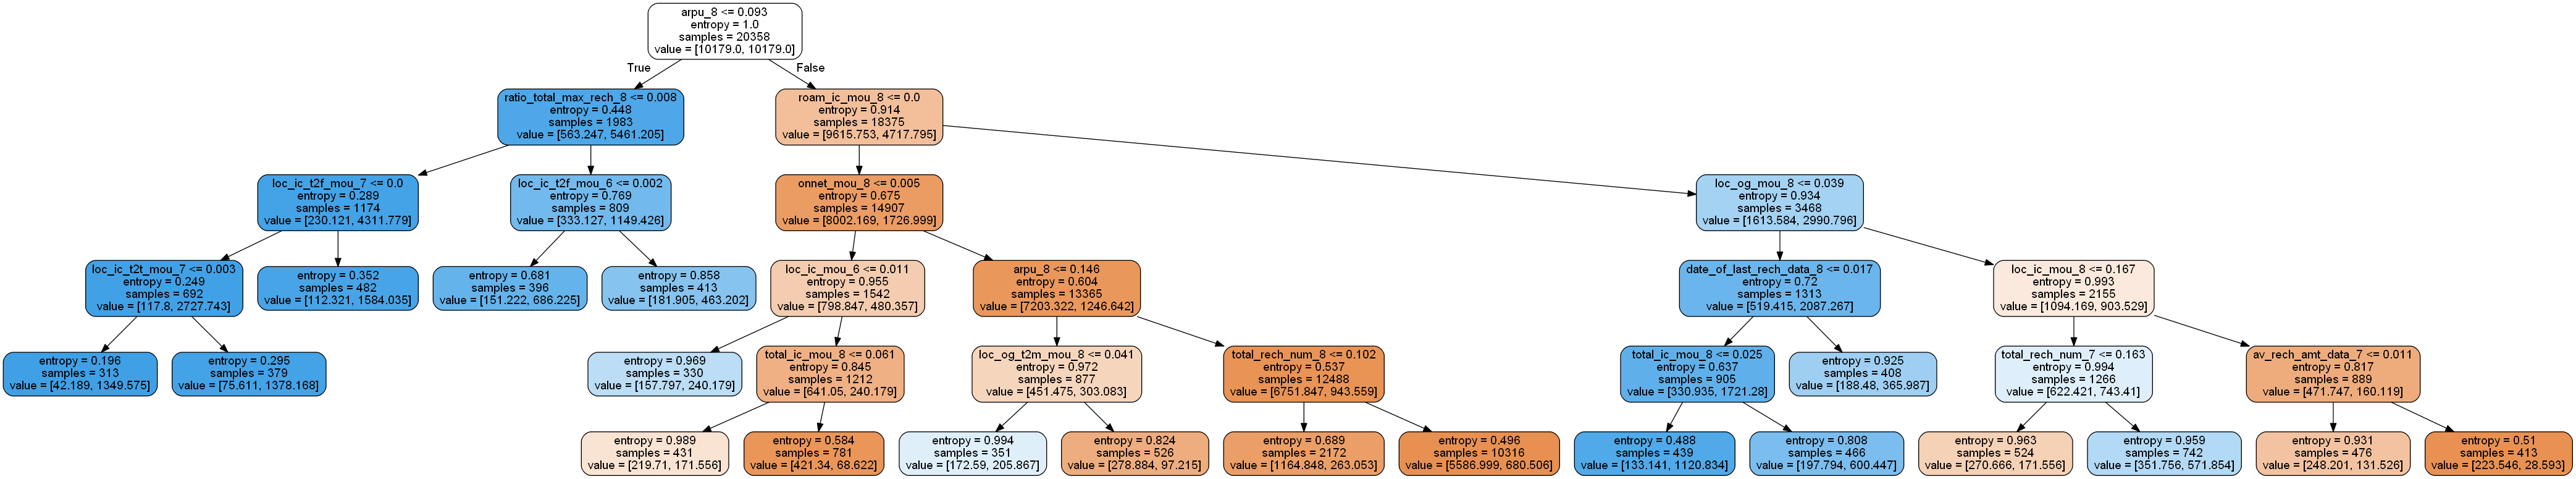

In [184]:
# plotting the tree for this decision tree model

dot_data = StringIO()  
export_graphviz(dtree_vars, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Displaying the tree in a png file
Image(graph.create_png())

In [185]:
# Exporting this decision tree to a pdf
graph.write_pdf("dtree_vars.pdf")

True

In [186]:
#Triggering garbage collection

gc.collect()

10119

Since some of the variables in the decision tree were eliminated from the logistic regression model to multicollinearity, let's refer to the most important variables according to logistic regression.

#### The most important variables are:
    loc_ic_t2m_mou_8
    loc_og_t2m_mou_8
    last_day_rch_amt_8
    date_of_last_rech_8
    total_og_mou_8
    loc_ic_t2t_mou_8
    loc_ic_t2f_mou_8


In [187]:
important_vars = ['loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'last_day_rch_amt_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 
               'loc_ic_t2f_mou_8']

In [188]:
#Creating a new dataframe that contains the average of the good phase months in order to compare them to the action phase

df_n =pd.DataFrame({"loc_ic_t2m_mou":df_2[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].median(axis=1),
                    "loc_og_t2m_mou":df_2[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].median(axis=1),
                    "last_day_rch_amt":df_2[['last_day_rch_amt_6','last_day_rch_amt_7']].median(axis=1) ,
                    "total_og_mou":df_2[['total_og_mou_6','total_og_mou_7']].median(axis=1) ,
                    "loc_ic_t2t_mou":df_2[['total_og_mou_6','total_og_mou_7']].median(axis=1) ,
                   "loc_ic_t2f_mou":df_2[['total_og_mou_6','total_og_mou_7']].median(axis=1) 
                   })

df_n["PHASE"]=["GOOD_PHASE"]*df_n.shape[0]
df_n["churn"] = df_2["churn"]

In [189]:
#Adding the target variable and the important variables to a previous dataframe

df_action= df_2[important_vars +["churn"]]


df_action.rename(columns = dict(zip(important_vars, ['loc_ic_t2m_mou', 'loc_og_t2m_mou', 
                                                    'last_day_rch_amt', 'total_og_mou', 
                                                    'loc_ic_t2t_mou', 'loc_ic_t2f_mou'])),
                 inplace = True
                )
df_action["PHASE"] =["ACTION"]*df_n.shape[0]
df_action.head()

,loc_ic_t2m_mou,loc_og_t2m_mou,last_day_rch_amt,total_og_mou,loc_ic_t2t_mou,loc_ic_t2f_mou,churn,PHASE
7,121.19,162.28,550,350.16,27.31,39.53,1,ACTION
8,15.48,50.54,10,171.56,0.31,0.00,0,ACTION
13,195.18,294.46,0,1015.26,52.58,7.49,0,ACTION
16,150.16,128.28,130,233.38,28.89,32.71,0,ACTION
17,0.00,0.00,0,0.00,0.00,0.00,0,ACTION


In [190]:
#Concatenating the two dataframes

df_new= pd.concat([df_n,df_action], axis = 0)
df_new.columns

Index(['PHASE', 'churn', 'last_day_rch_amt', 'loc_ic_t2f_mou',
       'loc_ic_t2m_mou', 'loc_ic_t2t_mou', 'loc_og_t2m_mou', 'total_og_mou'],
      dtype='object')

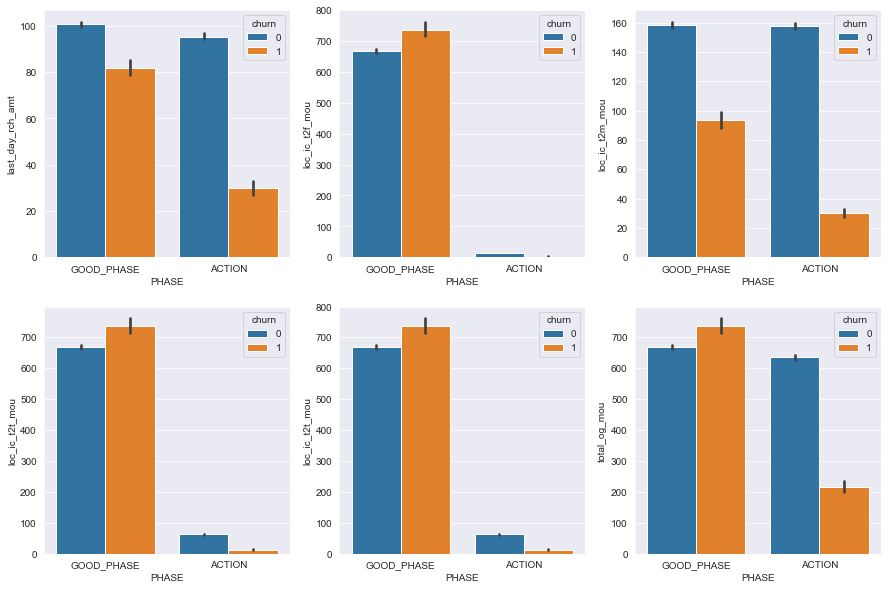

In [191]:
#Plotting barplots

fig,axis = plt.subplots(ncols = 3, nrows = 2, figsize =(15,10))
sns.barplot( y =df_new["last_day_rch_amt"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[0][0])
sns.barplot( y =df_new["loc_ic_t2f_mou"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[0][1])
sns.barplot( y =df_new["loc_ic_t2m_mou"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[0][2])
sns.barplot( y =df_new["loc_ic_t2t_mou"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[1][0])
sns.barplot( y =df_new["loc_ic_t2t_mou"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[1][1])
sns.barplot( y =df_new["total_og_mou"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[1][2])

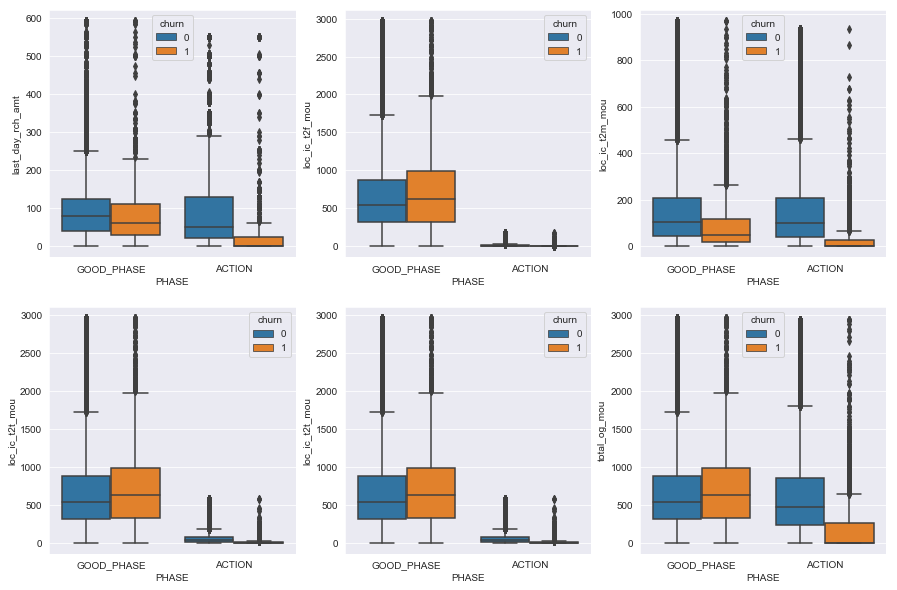

In [192]:
#Plotting boxplots

fig,axis = plt.subplots(ncols = 3, nrows = 2, figsize =(15,10))
sns.boxplot( y =df_new["last_day_rch_amt"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[0][0])
sns.boxplot( y =df_new["loc_ic_t2f_mou"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[0][1])
sns.boxplot( y =df_new["loc_ic_t2m_mou"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[0][2])
sns.boxplot( y =df_new["loc_ic_t2t_mou"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[1][0])
sns.boxplot( y =df_new["loc_ic_t2t_mou"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[1][1])
sns.boxplot( y =df_new["total_og_mou"], x= df_new["PHASE"], hue =df_new["churn"], ax = axis[1][2])

The above plots shows variations in the behavior of customers from the good phase to the action phase. In the good phase, both churn and non churn customers have similar number of incoming and outgoing calls and recharge amounts. However, in the action phase, the churn customers exhibit significantly different behavior than the non churn customers.

### Recommendations to manage customer churn

#### 1. Monitor the variables given above in the action phase to identify customers who are likely to churn.
#### 2. Provide an offer on local outgoing calls.
#### 3. Provide an offer that gives additional benefits to customers who recharge early in the month.